# Exploratory Data Analysis : Global Terrorism

Exploratory Data Analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. [Read more](https://en.wikipedia.org/wiki/Exploratory_data_analysis)


---

The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the [Study of Terrorism and Responses to Terrorism (START)](https://www.start.umd.edu/about/about-start), headquartered at the University of Maryland.

---

### ABOUT DATA: As mentioned before this dataset contains terror activities that have taken place from 1970 to 2017. That's a 47 year period, almost 5 decades worth of Terror. The dataset contains aproximately 180,000 rows and 135 columns a.k.a attributes. The dataset has been downloaded from [kaggle](https://www.kaggle.com/datasets/START-UMD/gtd)



![](https://www.worldatlas.com/r/w1200-h701-c1200x701/upload/93/44/56/terrorism-worldatlas.jpg)

## Here’s a step by step outline of this project:

1. Download the dataset using [opendatset](https://github.com/JovianML/opendatasets#opendatasets) library from Kaggle

2. Perform the following actions:
  ● Load the file using Pandas
  ● Look at some of the information regarding the file
  ● Fix any missing or incorrect values.

3. Perform Univariate Analysis on some of the attributes.
  ● Country
  ● City
  ● Region
  ● Group
  ● Month
  ● Attack type
  ● Target Type

4. Create intersting visualisations and animations to answer the following questions:


---


1.   Create WordClouds to show:
*   Worst affected Cities
*   Worst affected Nations
*   Group with most attacks
*   Most Commonly attacked Installations

2.   Create Bar Graph to see which country has been attacked the most?

3.   Create Bar Graph to see which city has been attacked the most?

4.   Which region has been attacked the most and What are the kind of casualties that have taken place becasue of such attacks? [TREEMAP](https://plotly.com/python/treemaps/)

5.   What is the most common attack type in the Top 3 countries and how many casualties can be attributed to to it? [Sunburst](https://plotly.com/python/sunburst-charts/)

6.   What is the most common Target Type in the top 3 counties? [Sunburst](https://plotly.com/python/sunburst-charts/)

7.   Which was the worst Year in recorded history? [Vertical Bar Graph](https://plotly.com/python/bar-charts/)

8.   What region has had the most significant increase in terror activities over the Years [Area Map](https://plotly.com/python/filled-area-on-mapbox/)

9.   Visualize the worst terror attacks? [Heat Map](https://plotly.com/python/heatmaps/)

10.   Most Common Attack type, cumalative?

11.   Most common Target type?

12.   How have Target Types evolved through the decades [sns.set](https://seaborn.pydata.org/generated/seaborn.set.html)

13.   Make [Cloropleths](https://plotly.com/python/choropleth-maps/) to show couties with most attack on Private Citizens?

14.   Create a list of Top Terror Groups

15.   List the Top 5 most active Terror Organizations

16.   [Heat Map(s)](https://plotly.com/python/heatmaps/)) OF MOST ACTIVE TERROR OUTFITS ATTACKS
*   Taliban
*   Shining Path
*   ISIS/ISIL/Islamic State
*   FMLN
*   Al-Shabab

17. How terror Outfits Take Responsibility of their Attacks? [Heat Map](https://plotly.com/python/heatmaps/)
18. How has Terror Attacks through the Regions evolved over the decades? [sns.set](https://seaborn.pydata.org/generated/seaborn.set.html)
19. What is the average number of people killed per attack by region?

20. Which group has conducted Suicide Bombings and their trend.

## How to Run the Code

You can execute the code by using the "Run" button at the top of this page and selecting "Run on Colab". You can make changes and save your own version of the notebook to [Jovian](https://jovian.ai/) by executing the following cells:

In [ ]:
!pip install jovian --upgrade --quiet

     |████████████████████████████████| 68 kB 3.2 MB/s 


In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="global-terrorism")

[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab


### Dependencies
The following are the dependencies that we will require for the project.

In [ ]:
!pip install -U matplotlib==3.2.2 --quiet
!pip install basemap --quiet

     |████████████████████████████████| 863 kB 4.5 MB/s 
     |████████████████████████████████| 30.5 MB 2.6 MB/s 
     |████████████████████████████████| 6.3 MB 30.0 MB/s 
     |████████████████████████████████| 219 kB 42.9 MB/s 


In [ ]:
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.graph_objects as go
import plotly.express as px
from mpl_toolkits.basemap import Basemap
warnings.filterwarnings('ignore')


## Download the Data

After we loaded by the dataset from [Kaggle](https://www.kaggle.com/datasets/START-UMD/gtd), using the [Opendataset](https://github.com/JovianML/opendatasets#opendatasets) library to directly upload the dataset to my Google Colab notebook

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/START-UMD/gtd'

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kartikayemadhok
Your Kaggle Key: ··········


100%|██████████| 28.7M/28.7M [00:00<00:00, 30.3MB/s]


One major aspect of data science is crosschecking and making sure were on the right track. In order to see if the files are indeed uploaded to the notebook, we shall use the listdir() function, which gives us a list of files within the directory.

In [ ]:
data_dir = 'gtd'

In [ ]:
import os
os.listdir(data_dir)

['globalterrorismdb_0718dist.csv']

## Data Preperation

In this section, we will perform below actions

1. Load the file using pandas.
2. Look at some information about the file.
3. Fix any missing or incorrect values.

PANDAS is another [python library](https://pandas.pydata.org/docs/) which is essential for data analysis, it lets us work with large datasets and make sense of all comma seperated values.

In [ ]:
terror_df = pd.read_csv('/content/gtd/globalterrorismdb_0718dist.csv',encoding='latin-1')

Sometimes in order to read CSV files in pandas or our IDE's we need to change their encoding. I honestly dont know much about it, but the good folks at Jovain gave me the last bit of the code in the line above and it makes the CSV file work perfectly, as can be seen by the head() function below.

In [ ]:
pd.set_option('display.max_columns', None)

We see that we have 135 columnn in the notebook, based on the questions we are asking; in the next section,

```
# This is formatted as code
```

 we shall reduce the columns to our usage.

In [ ]:
terror_df.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region                   region_txt provstate  \
0  Dominican Republic       2  Central America & Caribbean       NaN   
1              Mexico       1                North America   Federal   
2         Philippines       5               Southeast Asia    Tarlac   
3              Greece       8               Western Europe    Attica   
4               Japan       4                    East Asia   Fukouka   

            city   latitude   longitude  specificity  vicinity location  \
0  Santo Domingo  18.456792  -69.951164          1.0         0      NaN   
1    Mexico city  19.371887  -99.086624          1.0         0      NaN   
2        Unknown  15.478598  120.599741          4.0         0      NaN   
3         Athens  37.997490   23.762728          1.0         0      NaN   
4        Fukouka  33.580412  130.396361          1.0         0      NaN   

  summary  crit1  crit2  crit3  doubtterr  alternative alternative_txt  \
0     NaN      1      1      1        0.0          NaN             NaN   
1     NaN      1      1      1        0.0          NaN             NaN   
2     NaN      1      1      1        0.0          NaN             NaN   
3     NaN      1      1      1        0.0          NaN             NaN   
4     NaN      1      1      1       -9.0          NaN             NaN   

   multiple  success  suicide  attacktype1                 attacktype1_txt  \
0       0.0        1        0            1                   Assassination   
1       0.0        1        0            6     Hostage Taking (Kidnapping)   
2       0.0        1        0            1                   Assassination   
3       0.0        1        0            3               Bombing/Explosion   
4       0.0        1        0            7  Facility/Infrastructure Attack   

   attacktype2 attacktype2_txt  attacktype3 attacktype3_txt  targtype1  \
0          NaN             NaN          NaN             NaN         14   
1          NaN             NaN          NaN             NaN          7   
2          NaN             NaN          NaN             NaN         10   
3          NaN             NaN          NaN             NaN          7   
4          NaN             NaN          NaN             NaN          7   

                 targtype1_txt  targsubtype1  \
0  Private Citizens & Property          68.0   
1      Government (Diplomatic)          45.0   
2          Journalists & Media          54.0   
3      Government (Diplomatic)          46.0   
4      Government (Diplomatic)          46.0   

                                    targsubtype1_txt  \
0                                     Named Civilian   
1  Diplomatic Personnel (outside of embassy, cons...   
2                    Radio Journalist/Staff/Facility   
3                                  Embassy/Consulate   
4                                  Embassy/Consulate   

                         corp1                  target1  natlty1  \
0                          NaN             Julio Guzman     58.0   
1  Belgian Ambassador Daughter  Nadine Chaval, daughter     21.0   
2             Voice of America                 Employee    217.0   
3                          NaN             U.S. Embassy    217.0   
4                          NaN           U.S. Consulate    217.0   

          natlty1_txt  targtype2 targtype2_txt  targsubtype2 targsubtype2_txt  \
0  Dominican Republic        NaN           NaN           NaN              NaN   
1             Belgium        NaN           NaN           NaN              NaN   


## What is Terrorism

Terrorism is, in the broadest sense, the use of intentionally indiscriminate violence as a means to create terror among masses of people; or fear to achieve a religious or political aim

---

![](https://cdn.dnaindia.com/sites/default/files/styles/full/public/2018/02/07/648943-terrorists-file.jpg)

---

Although people resort to terrorism for a number of reasons, experts attribute most acts of violence to three major factors:

*   **Political:** People choose terrorism when they are trying to right what they perceive to be a social or political or historical wrong—when they have been stripped of their land or rights, or denied these.

*   **Religious:**perhaps the most commonly held belief today is that terrorism is caused by religion. Though it is not the main cause for terrorism, religion does play a significant role in driving some forms of it. Many terrorist get wrong understanding in religion


*   **Socioeconomic:** Various forms of deprivation can drive people to terrorism, in particular, poverty, lack of education, or lack of political freedom.


## Data Cleaning
In this section, we will perform below actions

1. Look at some information about the file.
2. Fix any missing or incorrect values.

In [ ]:
terror_df.shape

(181691, 135)

Lets start by finding the number of rows and columns present in the data set. We can do that by using the `.shape` command.

We see that our Global Terror dataset has `1,81,691` rows and `135` columns.

In [ ]:
terror_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive','suicide':'Suicide', 'eventid':'Event_ID'  },inplace=True)

As we can see 135, is way too many columns and on a closer inspection, most of those columns are not going to be very useful of our project. Keeping this in mind,  in the next few lines, we have decided to work with about 20 of the 135 columns. The have been renamed and sorted out for our usage in a new df called `terror_df2.`

In [ ]:
terror_df2=terror_df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive','Suicide','Event_ID']]

In [ ]:
terror_df2.head()

Year  Month  Day             Country    state                       Region  \
0  1970      7    2  Dominican Republic      NaN  Central America & Caribbean   
1  1970      0    0              Mexico  Federal                North America   
2  1970      1    0         Philippines   Tarlac               Southeast Asia   
3  1970      1    0              Greece   Attica               Western Europe   
4  1970      1    0               Japan  Fukouka                    East Asia   

            city   latitude   longitude                      AttackType  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   
2        Unknown  15.478598  120.599741                   Assassination   
3         Athens  37.997490   23.762728               Bombing/Explosion   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   

   Killed  Wounded                   Target Summary  \
0     1.0      0.0             Julio Guzman     NaN   
1     0.0      0.0  Nadine Chaval, daughter     NaN   
2     1.0      0.0                 Employee     NaN   
3     NaN      NaN             U.S. Embassy     NaN   
4     NaN      NaN           U.S. Consulate     NaN   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   
3                             Unknown      Government (Diplomatic)   
4                             Unknown      Government (Diplomatic)   

  Weapon_type Motive  Suicide      Event_ID  region_mean  kill-mean  \
0     Unknown    NaN        0  197000000001     1.666994  -0.666994   
1     Unknown    NaN        0  197000000002     1.666994  -1.666994   
2     Unknown    NaN        0  197001000001     1.666994  -0.666994   
3  Explosives    NaN        0  197001000002     1.666994        NaN   
4  Incendiary    NaN        0  197001000003     1.666994        NaN   

   absnkill-mean  
0       0.666994  
1       1.666994  
2       0.666994  
3            NaN  
4            NaN

Next, we're going to check the null values inside the dataset we're working with.

In [ ]:
terror_df2.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
Suicide             0
Event_ID            0
dtype: int64

In [ ]:
terror_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
 18  Suicide      181691 non-

**Some of the data has been cleaned for work on this notebook. More will be cleaned when the need arises.**

## Generic Questions that arise from the data [UNIVARIATE ANALYSIS]

While looking at the data set, some generic questions arise which can be answered by simple univariate analysis of the required columns and finding their maximum or minimum values. 

Without taking much time, we shall proceed to answer them immediately and try solving more complex questions later in the notebook.

---


![](https://static.themoscowtimes.com/image/article_1360/4b/65f14540a6db47d6b10c8473c11fb7a4.jpg)


---



Some of the Questions are as follows:


1.   Country with the most attacks?      
**IRAQ**

2.   City with the most attacks?         
**Baghdad**

3.   Region with the most attacks?       
**Middle East and North Africa**

4.   Year with the most attacks?         
**2014**

5.   Group with the most attacks?        
**Taliban**

6.   Most common attack type?            
**Bombing/Explosion**



---



In [ ]:
print("Country with the most attacks:",terror_df2['Country'].value_counts().idxmax())
print("City with the most attacks:",terror_df2['city'].value_counts().index[1]) 
print("Region with the most attacks:",terror_df2['Region'].value_counts().idxmax())
print("Year with the most attacks:",terror_df2['Year'].value_counts().idxmax())
print("Month with the most attacks:",terror_df2['Month'].value_counts().idxmax())
print("Group with the most attacks:",terror_df2['Group'].value_counts().index[1])
print("Most Attack Types:",terror_df2['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


# Exploritory Data Analysis and Visualizations


Now, we come to the fun part of the project where we analyze this massive dataset and come up with actionable insights and patterns.

## Q. Using WORDCLOUDS find some information regarding the following:

We shall start small and do a univariate anysis to create some WordClouds to let us know the following:



1.   Worst Affected Cities

2.   Most Active Terror Groups

3.   Worst Affected Nations

4.   Most Commonly Attacked Installations



### a.) Worst affected cities


As we can see from the Wordcloud created below the Worst affected nations due to Terror, in no particular order



*   Tribal Regions in Khyber Pakhtunkhwa inc Baluchistan and Kabul

*   Belfast and Londonderry amongst other nearby places in Northern Ireland

*   The UT of Jammu and Kashmir

*   Baghdad, Basra, Anbar Al in Iraq

*   Bengazi, Gaza Strip, etc.





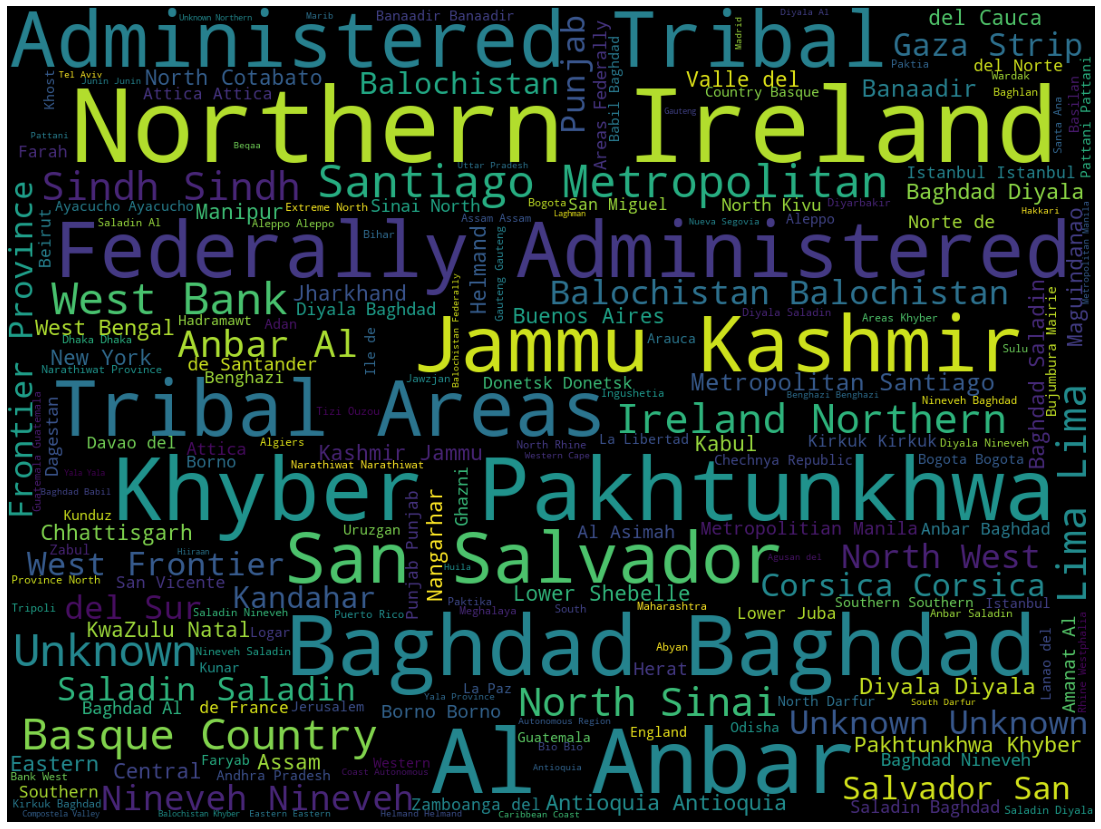

In [ ]:
from wordcloud import WordCloud
from scipy import signal
cities = terror_df2.state.dropna(False)
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color = 'black',
                     width = 1200,
                     height = 900).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

### b) Group with the most Attacks


The most active terror outfits in the last 5 odd decades are:



*   Taliban
*   Tehrik-i-Taliban
*   FMNL
*   ISIL/ISIS/Isaalmic State
*   Irish Republican Army
*   Shining Path
*   LTTE

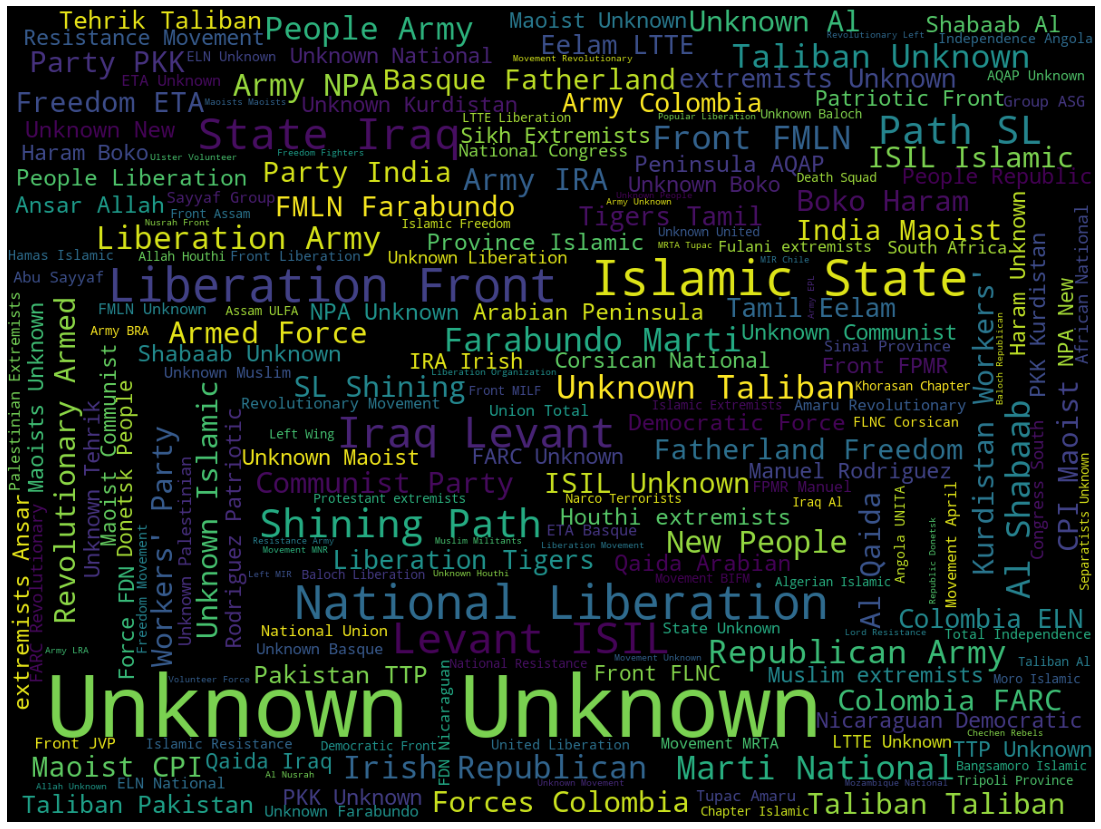

In [ ]:
from wordcloud import WordCloud
from scipy import signal
cities = terror_df2.Group.dropna(False)
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color = 'black',
                     width = 1200,
                     height = 900).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

### c) Worst affected Nations

Some of th nations that have faced the worst brunt of Terror are:



*   Iraq
*   Afghanistan
*   Pakistan
*   Ireland/UK
*   Nigeria
*   Colombia







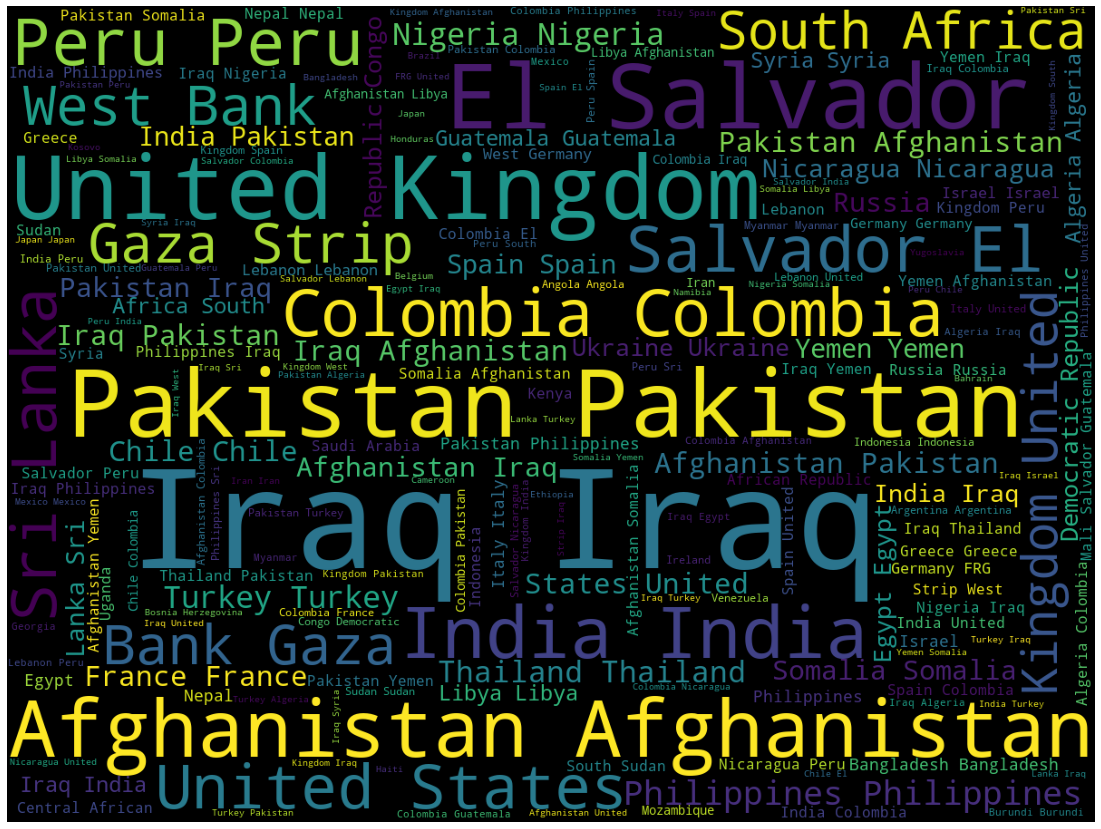

In [ ]:
from wordcloud import WordCloud
from scipy import signal
cities = terror_df2.Country.dropna(False)
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color = 'black',
                     width = 1200,
                     height = 900).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

### d) Most Commonly Attacked installations


The most commonly attacked installtions are:


*   Private Property
*   Military/Police Installtion
*   Relegious/Educational Institutions
*   Businesses





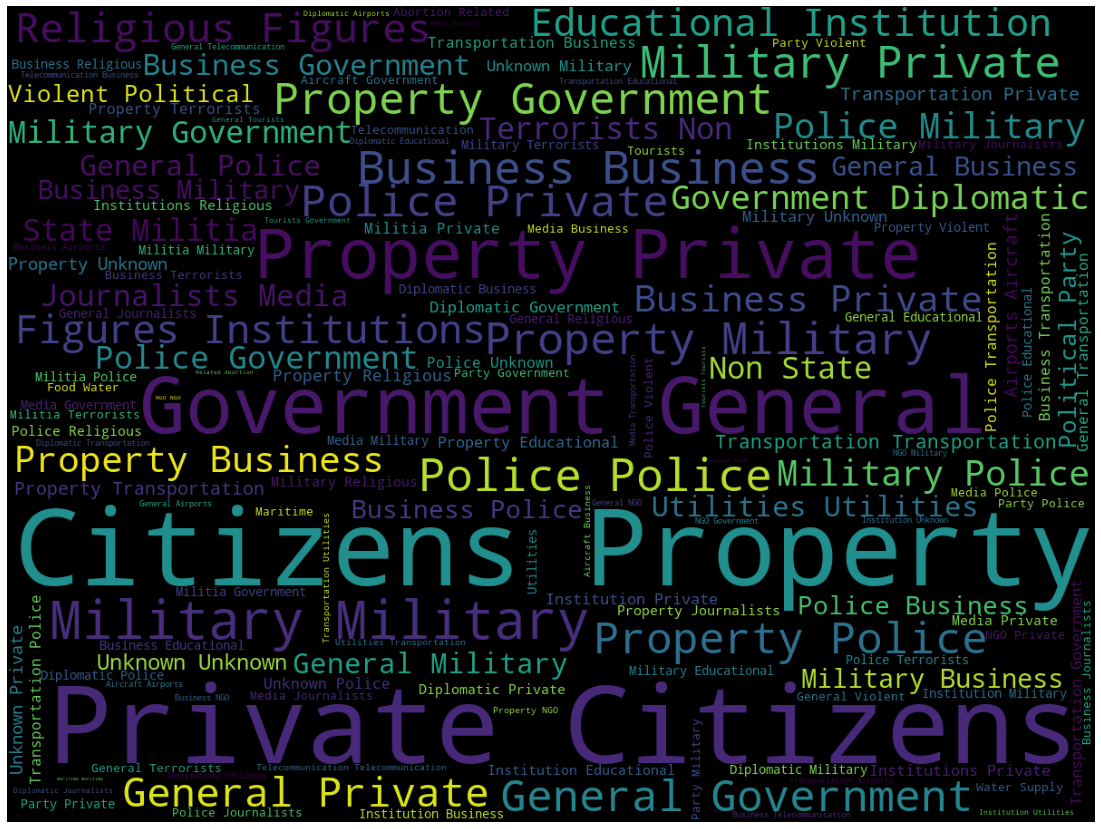

In [ ]:
from wordcloud import WordCloud
from scipy import signal
cities = terror_df2.Target_type.dropna(False)
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color = 'black',
                     width = 1200,
                     height = 900).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## BAR GRAPHS for better understanding of the Data

We shall create some bar graphs to better visualize the data. As per requirement, the data will be cleaned.

### Q2. Which countries that have been attacked the most and Why?

We shall look at the top 20 most attacked nations and try to understandd why terrorism is such a problem in these area?

In [ ]:
country_df = terror_df2['Country'].value_counts()[:21]
country_df = country_df.to_frame().reset_index()
country_df

index  Country
0             Iraq    24636
1         Pakistan    14368
2      Afghanistan    12731
3            India    11960
4         Colombia     8306
5      Philippines     6908
6             Peru     6096
7      El Salvador     5320
8   United Kingdom     5235
9           Turkey     4292
10         Somalia     4142
11         Nigeria     3907
12        Thailand     3849
13           Yemen     3347
14           Spain     3249
15       Sri Lanka     3022
16   United States     2836
17         Algeria     2743
18          France     2693
19           Egypt     2479
20         Lebanon     2478

In [ ]:
country_df.rename(columns={'index':'Country', 'Country':'Count'}, inplace=True)

In [ ]:
country_df

Country  Count
0             Iraq  24636
1         Pakistan  14368
2      Afghanistan  12731
3            India  11960
4         Colombia   8306
5      Philippines   6908
6             Peru   6096
7      El Salvador   5320
8   United Kingdom   5235
9           Turkey   4292
10         Somalia   4142
11         Nigeria   3907
12        Thailand   3849
13           Yemen   3347
14           Spain   3249
15       Sri Lanka   3022
16   United States   2836
17         Algeria   2743
18          France   2693
19           Egypt   2479
20         Lebanon   2478

As we see from the bar graph charted using `Plotly express` that **IRAQ** has the most number of casualties that can be  attributed to terrorism. It may be attributed to the American presence in the region since 2004. 

In second third and fourth position we havve the western Nations of the **Hindu-Kush Himalayan Region** and these high numbers can also be attributed to the *American presence* in **Afghanistan** from 2001 onwards, which has had a cascading effedct into the *tribal regions* of **Pakistan**, **India** on the other hand suffers from Cross border terrorism.

**Columbia and Peru** also figure highly in the list due to the presence of cocaine and other illicit producing operations that are performed by insurgencts like FARC in the Amazonian perfiphery.

In [ ]:
fig = px.bar(data_frame=country_df, 
             x="Country", 
             y="Count", 
             title="20 most attacked counties from 1970 - 2017", orientation='v', color='Count', template='plotly_dark' )
fig.show(renderer="colab")

#### Q3. Which cities have been targetted the most and do they correspond to the most attacked Nations?

In [ ]:
cities_df = terror_df2['city'].value_counts()[:21]
cities_df = cities_df.to_frame().reset_index()
cities_df

index  city
0          Unknown  9775
1          Baghdad  7589
2          Karachi  2652
3             Lima  2359
4            Mosul  2265
5          Belfast  2171
6         Santiago  1621
7        Mogadishu  1581
8     San Salvador  1558
9         Istanbul  1048
10          Athens  1019
11          Bogota   984
12          Kirkuk   925
13          Beirut   918
14        Medellin   848
15        Benghazi   840
16        Peshawar   819
17          Quetta   803
18  Guatemala City   755
19         Baqubah   745
20           Kabul   738

In [ ]:
cities_df.rename(columns={'index':'City', 'city':'Count'}, inplace=True)

Since, there are more than **8,000** values of Cities which are null, we must remove them from our visualization, for this this instance. This is done by using the code below.

In [ ]:
cities_df=cities_df.drop(labels=0, axis=0)
cities_df

City  Count
1          Baghdad   7589
2          Karachi   2652
3             Lima   2359
4            Mosul   2265
5          Belfast   2171
6         Santiago   1621
7        Mogadishu   1581
8     San Salvador   1558
9         Istanbul   1048
10          Athens   1019
11          Bogota    984
12          Kirkuk    925
13          Beirut    918
14        Medellin    848
15        Benghazi    840
16        Peshawar    819
17          Quetta    803
18  Guatemala City    755
19         Baqubah    745
20           Kabul    738

The ancient city of `Baghdad`, wherre Hamurabi gave the first codified laws has been ravaged by terror attacks more than 7000 times in the past half a century. A majority of the attacks happening since the start if **Operation Iraqi Freedom** and the advent of **ISIS/ISIL** There are a few other Iraqi cities oon the list like `Mosul, Kirkuk, Fallujah and Basra` (which comes in just outisde the top 50.)

`Medellin`, the birthplace of the infamous Medellin Cartel headed by Pablo Escobar, makes an appearance at No. 14, alonf with `Lima` (no.3) and `Santiago` (no. 6) reprasent South American continent.

Afghan and Pakistani cities like `Karachi` (no.2), `Peshawar, Kabul and Kandahar` are also present in the top 50.

European cities like `Belfast and Londonderry` appear prominently in the list du to the terror activities of IRA in the late 70's.

Indian Cities like `Srinagar`(cross border terrorism) and `Imphal` (AFSPA) make an appearence, further down the list

In [ ]:
fig = px.bar(data_frame=cities_df, x="City", y="Count", title="20 most attacked Cities from 1970 - 2017", orientation='v', color='Count', template='plotly_dark')
fig.show(renderer="colab")

## Treemaps and Sunbursts

### Q4. Which region has been attacked the most and What are the kind of casualties that have taken place becasue of such attacks?

In order to make an interactive map of the total number of people killed in each region due to terror attacks, using a tree map.

In [ ]:
region_df = terror_df2
region_df['World'] ='World'
region_df.head()

Year  Month  Day             Country    state                       Region  \
0  1970      7    2  Dominican Republic      NaN  Central America & Caribbean   
1  1970      0    0              Mexico  Federal                North America   
2  1970      1    0         Philippines   Tarlac               Southeast Asia   
3  1970      1    0              Greece   Attica               Western Europe   
4  1970      1    0               Japan  Fukouka                    East Asia   

            city   latitude   longitude                      AttackType  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   
2        Unknown  15.478598  120.599741                   Assassination   
3         Athens  37.997490   23.762728               Bombing/Explosion   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   

   Killed  Wounded                   Target Summary  \
0     1.0      0.0             Julio Guzman     NaN   
1     0.0      0.0  Nadine Chaval, daughter     NaN   
2     1.0      0.0                 Employee     NaN   
3     NaN      NaN             U.S. Embassy     NaN   
4     NaN      NaN           U.S. Consulate     NaN   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   
3                             Unknown      Government (Diplomatic)   
4                             Unknown      Government (Diplomatic)   

  Weapon_type Motive  Suicide      Event_ID  region_mean  kill-mean  \
0     Unknown    NaN        0  197000000001     1.666994  -0.666994   
1     Unknown    NaN        0  197000000002     1.666994  -1.666994   
2     Unknown    NaN        0  197001000001     1.666994  -0.666994   
3  Explosives    NaN        0  197001000002     1.666994        NaN   
4  Incendiary    NaN        0  197001000003     1.666994        NaN   

   absnkill-mean  World  
0       0.666994  World  
1       1.666994  World  
2       0.666994  World  
3            NaN  World  
4            NaN  World

In [ ]:
fig= px.treemap(region_df,
               path=['World','Region','Country'],
               values='Killed',
               color='Region',
               color_continuous_scale='RdBu',
               template='plotly_dark')

fig.show(renderer="colab")

As can be seen above using the treemap (made using `plotly`):

1.   The middle east and north africa region has seen by far the most number of terror attacks. The total number of people killed is 1,37,642.
2.   Within the middle east the number of people killed in Iraq alone stand almost 79,000
3.   South Asia has close to 1,00,000 people dead. With Afghanistan leading the charge with about 40,000 casulties. Pakistan a close second with 25,000 dead.
4.   Boko Haram has caused death of almost 23,000 people in Nigeria alone.




### Q5. What is the most common attack type in the Top 3 countries and how many casualties can be attributed to to it?

To answer this question, we can create a `sunburst`, using most of the same data as gthe Treemap, but with the added layer of the `Attack Type`

In [ ]:
fig = px.sunburst(region_df.dropna(),
                path=['Region', 'Country', "AttackType"],
                values='Killed',
                color_continuous_scale="RdBu")

fig.update_layout(width = 1500,
                  height= 900,
                  template='plotly_dark')

fig.show(renderer="colab")

The top three countries are Iraq, Afghanistan and Pakistan.


*   In `IRAQ` the most commmon attack type is `BOMBING/EXPLOSION` which has caused aproximately `25,000 deaths`
*   In `Afganistan` the most commmon attack type is `BOMBING/EXPLOSION` which has caused aproximately `5,500 deaths`
*   In `Pakistan` the most commmon attack type is `BOMBING/EXPLOSION` which has caused aproximately `8,000 deaths`




### Q6. What is the most common Target Type in the top 3 counties?

As can be seen by the sunburst below, the most common target type in these countries is Private Citizens and Property, followed by Military / Police installations and the Government and Relegious institutions



*   `Iraq` : `17,500` killed
*   `Afghanistan` : `9500` killed
*   `Pakistan` :  `4500` killed

In [ ]:
fig = px.sunburst(region_df.dropna(),
                path=['Region', 'Country', "Target_type"],
                values='Killed',
                color_continuous_scale="RdBu")

fig.update_layout(width = 1500,
                  height= 900,
                  template='plotly_dark')

fig.show(renderer="colab")

**Other Observations** 


*   As can be seen from the interactive treemap and the sunburst most terrorist activities are in the Asian continent. 
*   The two most ravaged regions are `MENA (Middle East and North Africa) and The Hindu-Kush Himalayan Region (HKH)`

 

## Area Maps and Vertical Bars

### Q7. Which year was the worst in regards to number of terrorist activities?



The below graph is made using matplotlib, another very versatile python library for data analysis.

It can be observed from this visualisation that the number of terrrorist attacks increased manifold since the dawn of the new millinium.

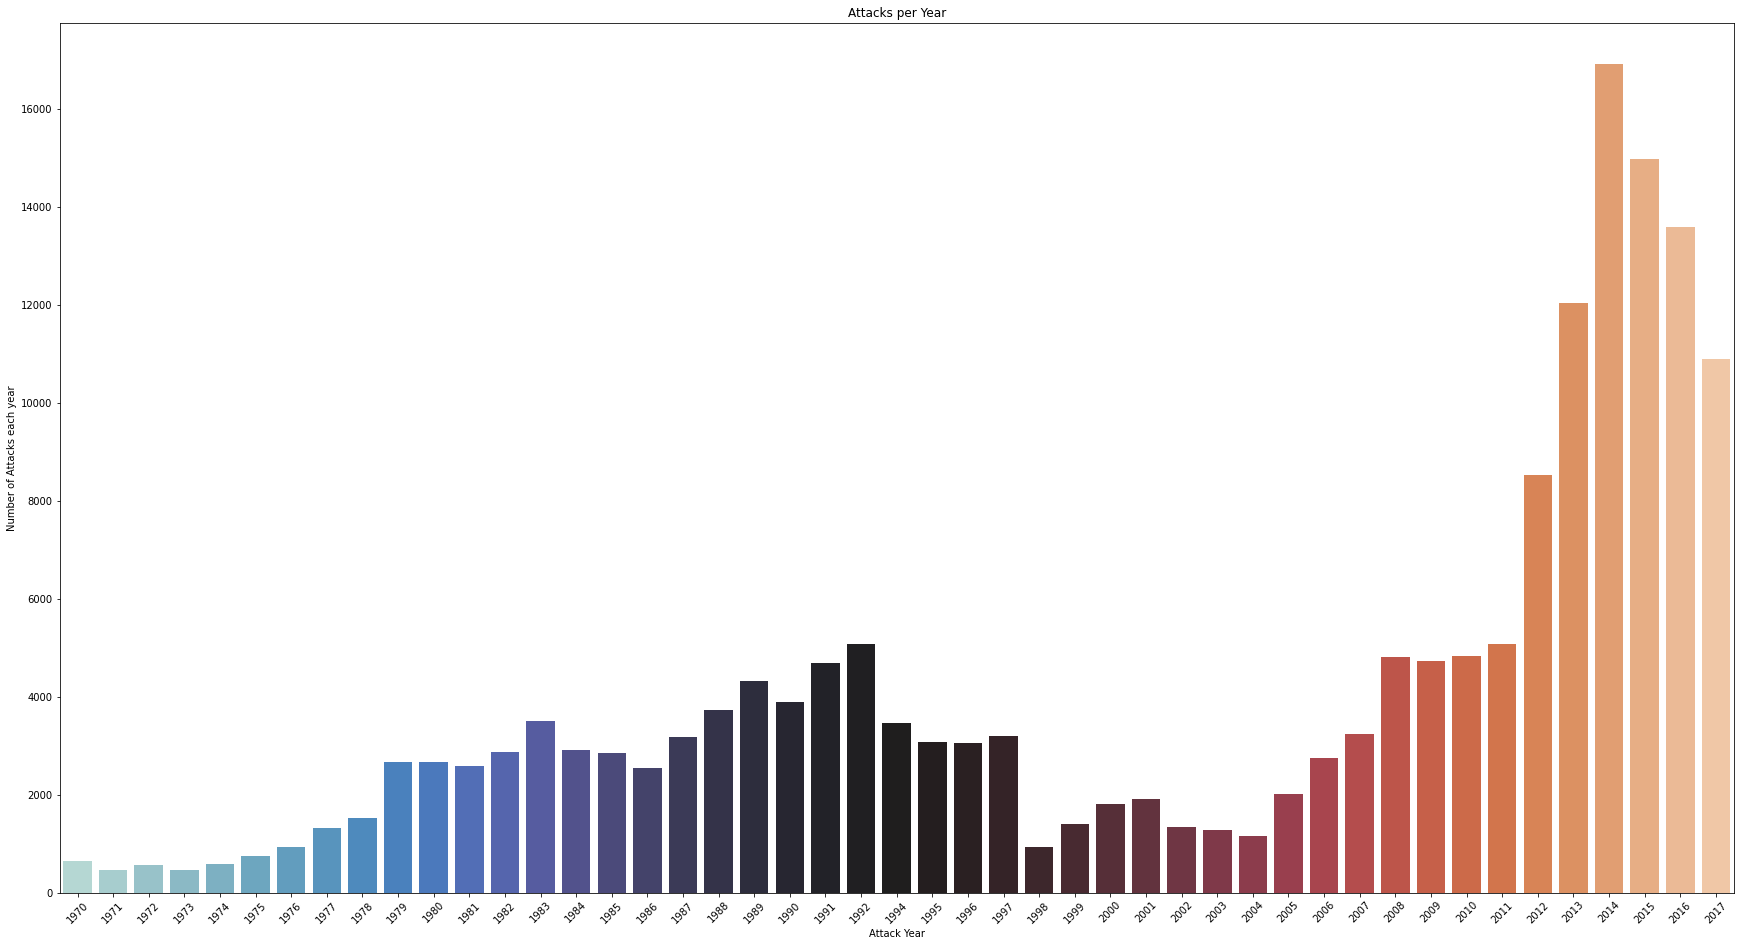

In [ ]:
x_year = terror_df2['Year'].unique()
y_count_years = terror_df2['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (30,16))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'icefire')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attacks per Year')
plt.show()

As we can see, the quantum of Terror has increased significantly with the turn of the millenium. The most violent year being `2014`

### Q8. What region has had the most significant increase in terror activities over the years?

This time we will use an `area map` to visualize the same data. It too shows us that the terror activities have increased in the `MENA` and `HK-H` regions manyfold since the early `2000's`

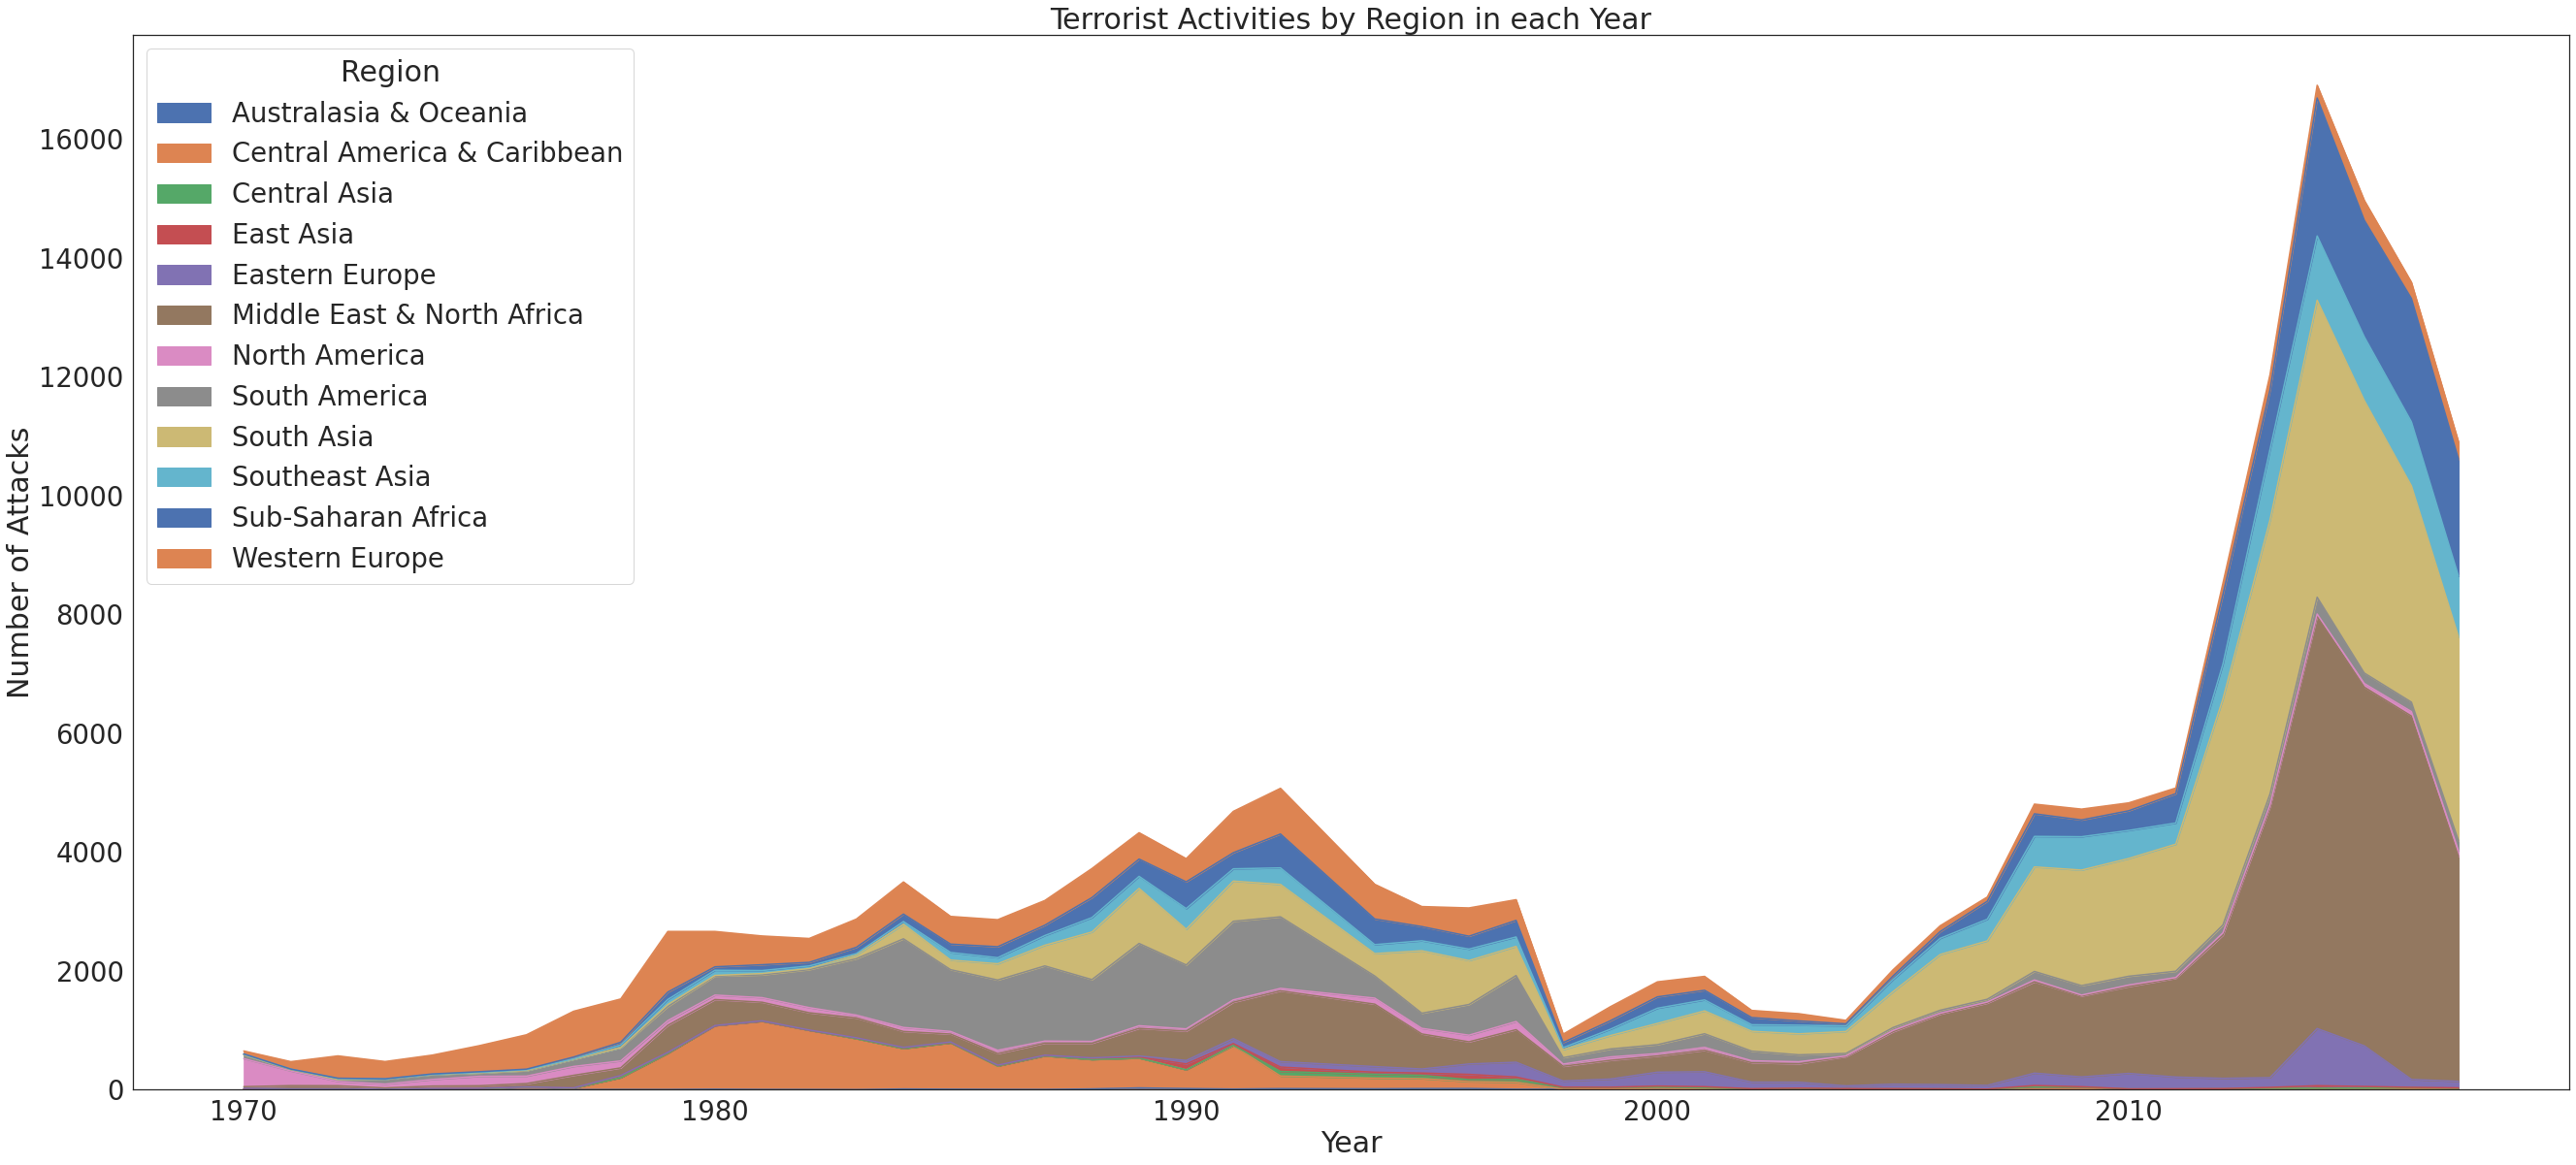

In [ ]:
pd.crosstab(terror_df2.Year, terror_df2.Region).plot(kind='area',figsize=(45,20))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

## Heat Maps

### Q9. Visualize the worst terror attacks using a Heat Map.


To find the number of casualties, we shall merge two series, namely: `Wounded` and `Killed`

In [ ]:
terror_df2['Wounded'] = terror_df2['Wounded'].fillna(0).astype(int)
terror_df2['Killed'] = terror_df2['Killed'].fillna(0).astype(int)
terror_df2['casualities'] = terror_df2['Killed'] + terror_df2['Wounded']

In [ ]:
terror1 = terror_df2.sort_values(by='casualities',ascending=False)[:50]

In [ ]:
heat=terror1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)

In [ ]:
heat

Year            1982   1984   1987   1992    1994    1995   1996   1997  \
Country                                                                   
Afghanistan      0.0    0.0    0.0    0.0     0.0     0.0    0.0    0.0   
Algeria          0.0    0.0    0.0    0.0     0.0     0.0    0.0  450.0   
Chad             0.0    0.0    0.0    0.0     0.0     0.0    0.0    0.0   
Egypt            0.0    0.0    0.0    0.0     0.0     0.0    0.0    0.0   
Ethiopia         0.0    0.0    0.0  500.0     0.0     0.0    0.0    0.0   
France           0.0    0.0    0.0    0.0     0.0     0.0    0.0    0.0   
India            0.0    0.0    0.0    0.0     0.0     0.0    0.0    0.0   
Iran           760.0    0.0    0.0    0.0     0.0     0.0    0.0    0.0   
Iraq             0.0    0.0    0.0    0.0     0.0     0.0    0.0    0.0   
Japan            0.0    0.0    0.0    0.0   507.0  3092.0    0.0    0.0   
Kenya            0.0    0.0    0.0    0.0     0.0     0.0    0.0    0.0   
Libya            0.0    0.0    0.0    0.0     0.0     0.0    0.0    0.0   
Mozambique       0.0    0.0  458.0    0.0     0.0     0.0    0.0    0.0   
Nepal            0.0    0.0    0.0    0.0     0.0     0.0    0.0    0.0   
Pakistan         0.0    0.0    0.0    0.0     0.0     0.0    0.0    0.0   
Russia           0.0    0.0    0.0    0.0     0.0     0.0    0.0    0.0   
Rwanda           0.0    0.0    0.0    0.0  1180.0     0.0    0.0  498.0   
Somalia          0.0    0.0    0.0    0.0     0.0     0.0    0.0    0.0   
South Sudan      0.0    0.0    0.0    0.0     0.0     0.0    0.0    0.0   
Spain            0.0    0.0    0.0    0.0     0.0     0.0    0.0    0.0   
Sri Lanka        0.0    0.0    0.0    0.0     0.0     0.0  907.0    0.0   
Syria            0.0    0.0    0.0    0.0     0.0     0.0    0.0    0.0   
Tajikistan       0.0    0.0    0.0  800.0     0.0     0.0    0.0    0.0   
United States    0.0  751.0    0.0    0.0     0.0   818.0    0.0    0.0   

Year             1998    2001     2004   2005    2006        2007    2008  \
Country                                                                     
Afghanistan       0.0     0.0     0.00    0.0     0.0    0.000000     0.0   
Algeria           0.0     0.0     0.00    0.0     0.0    0.000000     0.0   
Chad              0.0     0.0     0.00    0.0     0.0    0.000000  1161.0   
Egypt             0.0     0.0     0.00    0.0     0.0    0.000000     0.0   
Ethiopia          0.0     0.0     0.00    0.0     0.0    0.000000     0.0   
France            0.0     0.0     0.00    0.0     0.0    0.000000     0.0   
India             0.0     0.0     0.00    0.0  1005.0    0.000000     0.0   
Iran              0.0     0.0     0.00    0.0     0.0    0.000000     0.0   
Iraq              0.0     0.0     0.00  702.0   462.0  833.333333     0.0   
Japan             0.0     0.0     0.00    0.0     0.0    0.000000     0.0   
Kenya          4224.0     0.0     0.00    0.0     0.0    0.000000     0.0   
Libya             0.0     0.0     0.00    0.0     0.0    0.000000     0.0   
Mozambique        0.0     0.0     0.00    0.0     0.0    0.000000     0.0   
Nepal             0.0     0.0   734.00    0.0     0.0    0.000000     0.0   
Pakistan          0.0     0.0     0.00    0.0     0.0    0.000000     0.0   
Russia            0.0     0.0  1071.00    0.0     0.0    0.000000     0.0   
Rwanda            0.0     0.0     0.00    0.0     0.0    0.000000     0.0   
Somalia           0.0     0.0     0.00    0.0     0.0    0.000000     0.0   
South Sudan       0.0     0.0     0.00    0.0     0.0    0.000000     0.0   
Spain             0.0     0.0   497.75    0.0     0.0    0.000000     0.0   
Sri Lanka         0.0     0.0     0.00    0.0     0.0    0.000000     0.0   
Syria             0.0     0.0     0.00    0.0     0.0    0.000000     0.0   
Tajikistan        0.0     0.0     0.00    0.0     0.0    0.000000     0.0   
United States     0.0  9574.0     0.00    0.0     0.0    0.000000     0.0   

Year            2009   2013         2014   201

In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 50 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)
fig.show(renderer="colab")

From the above heat map, We see the single worst terrorist attack took place on September 11, 2001 when the World Trade Centre was brought down by crashing two hijacked planes into it.
The WTC attack in Kenya in 1998 also caused upwardws of 4000 deaths, this was the second worst terror attack in recorded history. 
Seems like the terrorists were vert anti  world trade.

## Bar Plots for Cumalative Assesment

### Q10. Cumalative Attack Types throughout the planet.

 We will now plot a bar graph to figure out which is the most common type of terror attack that has  been carried out from 1970 - 2013.

 As we can see `Bombing` is the go to attack type, followed by `Armed Assault` and `Kidnapping`

In [ ]:

attackTypes = terror_df2['AttackType']

x = attackTypes.value_counts().index
y = attackTypes.value_counts().values

trace2 = go.Bar(
        x=x ,
        y=y,
        marker=dict(
            color=y,
            colorscale = 'Viridis',
            reversescale = True
        ),
        name="Attack types",    
    )
layout = dict(
        title="Attack types",
        xaxis=go.layout.XAxis(
          automargin=True),
        yaxis=dict(
            showgrid=False,
            showline=False,
            showticklabels=True,
        ), 
    )
fig1 = go.Figure(data=[trace2], layout=layout)
fig1.show(renderer="colab")

### Q11. Which is the most affected Target Type cumalatively?

 We will now plot a bar graph to figure out which is the most common type of terror attack that has  been carried out from 1970 - 2013.

 As we can see `Private Citizens and Property`, `Military and Police Installations`, `Government Installations` and `Businesses` is the go to Targets


In [ ]:
targetTypes =  terror_df2['Target_type']

x = targetTypes.value_counts().index
y = targetTypes.value_counts().values

trace2 = go.Bar(
        x=x ,
        y=y,
        marker=dict(
            color=y,
            colorscale = 'Viridis',
            reversescale = True
        ),
        name="Who sufferred the most",    
    )
layout = dict(
        title="Who sufferred the most",
        xaxis=go.layout.XAxis(
          automargin=True),
        yaxis=dict(
            showgrid=False,
            showline=False,
            showticklabels=True,
  
        ), 
    )
fig1 = go.Figure(data=[trace2], layout=layout)
fig1.show(renderer="colab")

#### Q12. How has `Target Types` evolved through the Decades?

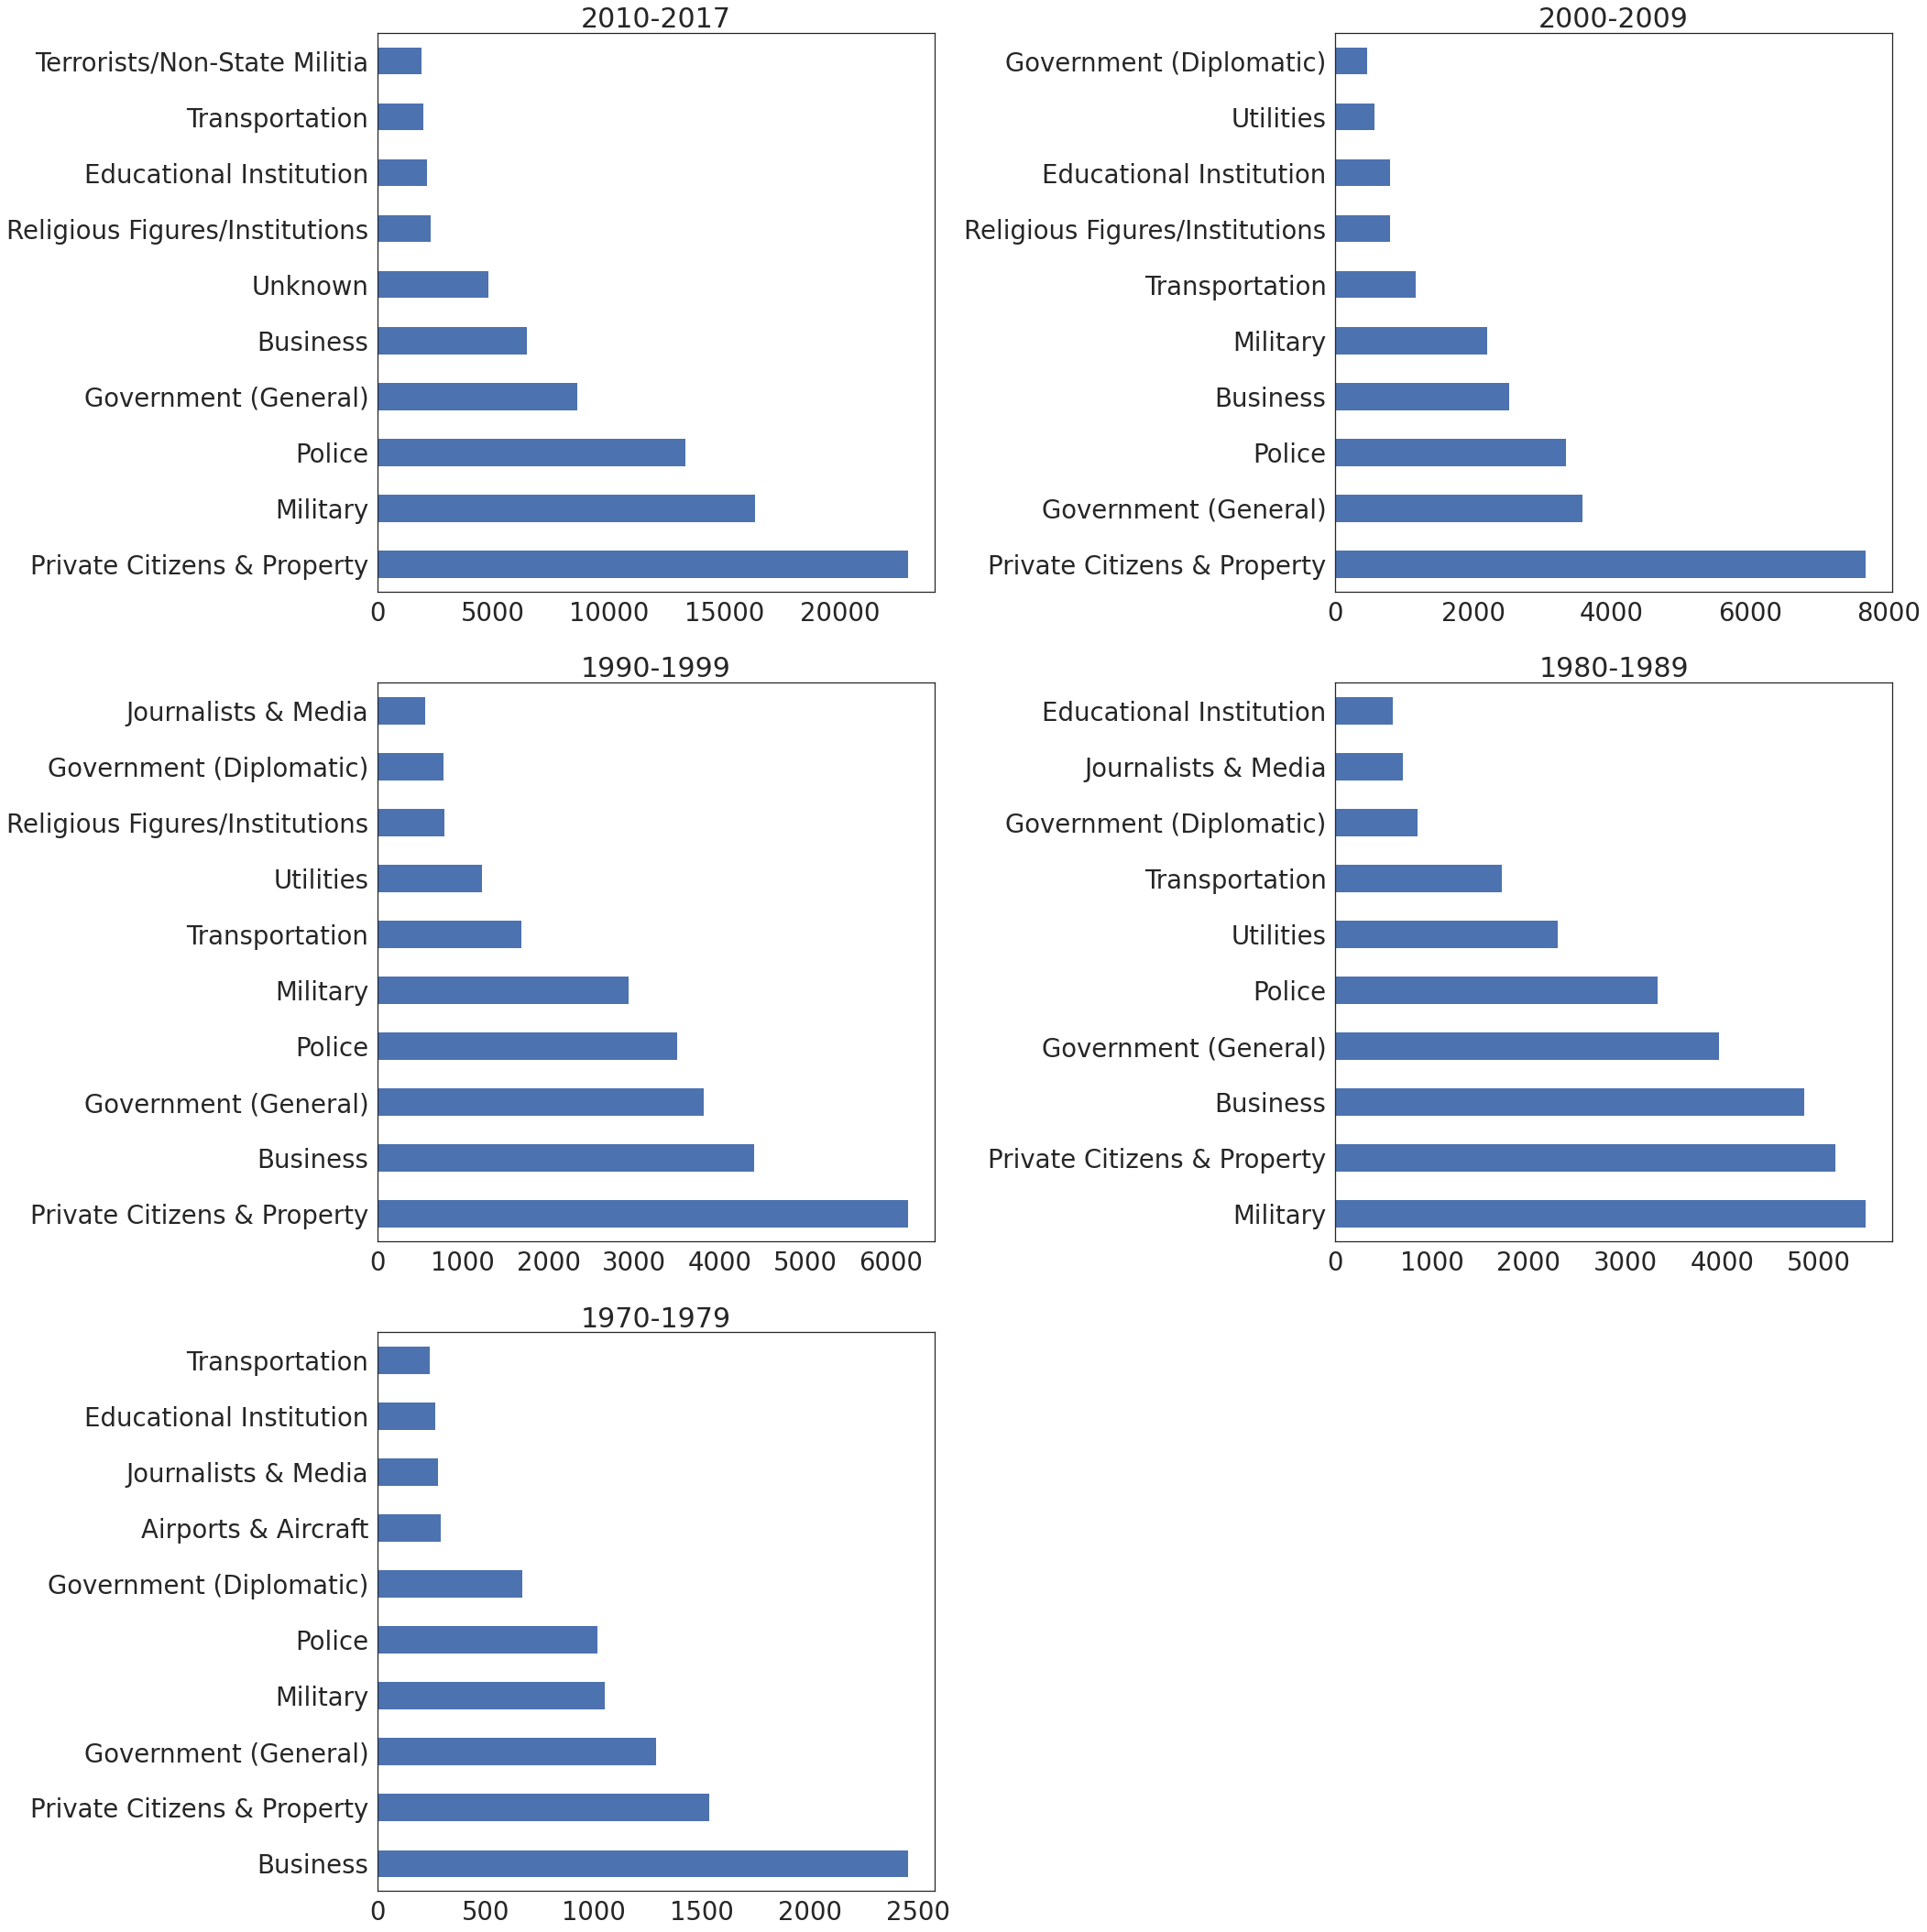

In [ ]:
def plot_by_years(kind='Region',big=(30,20)):
    sns.set(style="white",font_scale=2.5)
    fig = plt.figure(figsize=big)
    
    ax1 = fig.add_subplot(3,2,1)
    ax1.set_title('2010-2017')
    ax1.set_ylabel('');
    terror_df2[terror_df2['Year']>=2010]['Event_ID'].groupby(terror_df2[kind]).count().sort_values(ascending=False)[:10].plot(kind='barh');
    ax1.set_ylabel('');

    ax2 = fig.add_subplot(3,2,2)
    ax2.set_title('2000-2009')
    terror_df2[(terror_df2['Year']>=2000) & (terror_df2['Year']<2010)]['Event_ID'].groupby(terror_df2[kind]).count().sort_values(ascending=False)[:10].plot(kind='barh');
    ax2.set_ylabel('');

    ax3 = fig.add_subplot(3,2,3)
    ax3.set_title('1990-1999')
    terror_df2[(terror_df2['Year']>=1990) & (terror_df2['Year']<2000)]['Event_ID'].groupby(terror_df2[kind]).count().sort_values(ascending=False)[:10].plot(kind='barh');
    ax3.set_ylabel('');

    ax4 = fig.add_subplot(3,2,4)
    ax4.set_title('1980-1989')
    terror_df2[(terror_df2['Year']>=1980) & (terror_df2['Year']<1990)]['Event_ID'].groupby(terror_df2[kind]).count().sort_values(ascending=False)[:10].plot(kind='barh');
    ax4.set_ylabel('');

    ax5 = fig.add_subplot(3,2,5)
    ax5.set_title('1970-1979')
    terror_df2[(terror_df2['Year']>=1970) & (terror_df2['Year']<1980)]['Event_ID'].groupby(terror_df2[kind]).count().sort_values(ascending=False)[:10].plot(kind='barh');
    


    plt.tight_layout()
    plt.ylabel('');
plot_by_years(kind='Target_type',big=(30,30));
    

 


1. `Private Citizens and Property` have almost always been the go to target    types for terror outfits. Except for in the `1970's` and the `1980's`, where `Businesses` and `Military installations` were the top targets respectively.

2. This was due to Terrorism bring more active in the western hemisphere, where attacking on occupier businesses as in the case of IRAS and FMNL on soverign territory. And in the 80's the attacks were on the `Military installation` which were set up to safeguard the occupier/friendly businesses.

##  Choropleths and different map Projections


### Q13. Countries that have seen most violence againt Private Citizens and Property

In this choropleth we have used the `equidistant` projection instead of the eurocentric `mercator` projection for the map.

In [ ]:
terror_filter = terror_df2[terror_df2['Target_type'] == "Private Citizens & Property"]
terror_count = terror_filter.groupby(['Country'])['Target_type'].count()
countries = pd.DataFrame({'country':terror_count.index,'number':terror_count.values })
data = [dict(
    type='choropleth',
    locations=countries['country'],
    locationmode='country names',
    z=countries['number'],
    text=countries['country'],
    colorscale='Viridis',
    reversescale=True,
    marker=dict(line=dict(color='rgb(180,180,180)', width=0.5)),
    colorbar = {'title': 'No of incidents'},
)]
layout = dict(
    title='No of incidents across the world to disrupt Private Citizens & Property',
    autosize=True,
    geo=dict(showframe=False, showcoastlines=True, projection=dict(type='equirectangular'))    
)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  width=3000, 
                  height=1200)
fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

## TERROR GROUPS

### Q.14 List the Top Terrorist Groups based on the damage they've cause

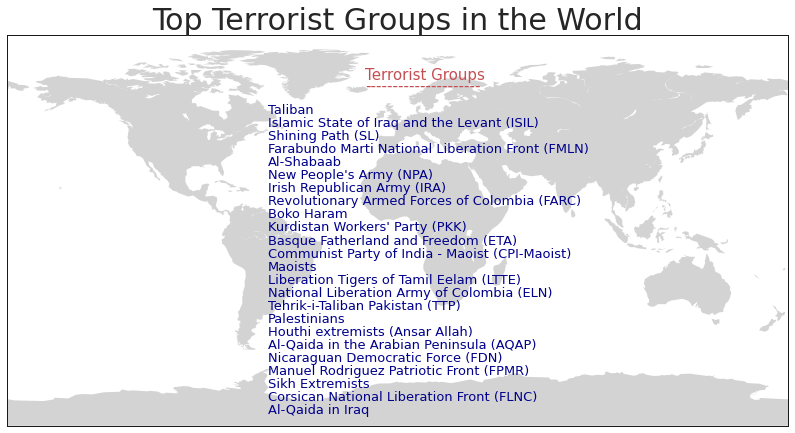

In [ ]:
orgs = terror_df2['Group'].value_counts().head(25).index

fig = plt.figure(figsize=(14,10))
cmap = plt.get_cmap('coolwarm')


map = Basemap(projection='cyl')
map.drawmapboundary()
map.fillcontinents(color='lightgray',zorder=1)
org=['Taliban','Shining Path (SL)']
plt.text(-15,70,'Terrorist Groups', color='r', fontsize=15)
plt.text(-15,65,'---------------------',color='r', fontsize=15)
j=60
for i in range(25):
  if i > 0:
    plt.text(-60,j,orgs[i],color='darkblue', fontsize=13)
  j=j-6
plt.title('Top Terrorist Groups in the World')  
plt.show()

### Q.15 List the Top 5 most active Terror Organizations

From the below interactive horizontal bar plot we see that over the period of 1970 to 2017, Taliban has been the most active terror orgainsation w.r.t number of attacks commited.

In [ ]:
unknown = terror_df2['Group'].isin(['Unknown'])
fig = px.bar( 
             y = terror_df2[~unknown]['Group'].value_counts().head(6).index,
             x = terror_df2[~unknown]['Group'].value_counts().head(6).values,
             title="Most Active Terror Outfits from 1970 - 2017",
             orientation='h',
             #hover_data=["Killed"],
             #color='Killed', 
             template='plotly_dark')
fig.show(renderer="colab")

### Q.16 HEAT MAP(S) OF MOST ACTIVE TERROR OUTFITS ATTACKS

We will now proceed to create a heatmap of the top 5 terror outfits.


### Q.16(a) TALIBAN

Taliban has been active since they stormed into Kabul in 1996, they have been actively performing terror activities in Afghanistan and neighbouring nations since the American led Freedom effort in 2001.

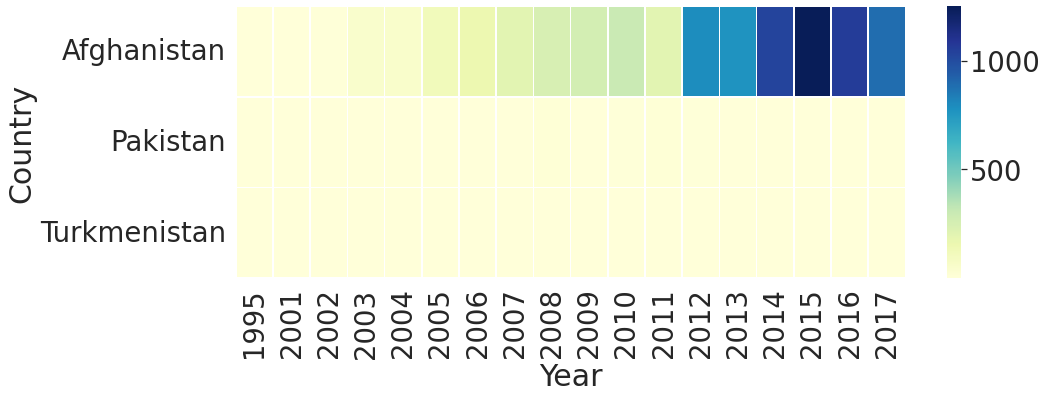

In [ ]:
terror_filter = terror_df2[terror_df2['Group'] == "Taliban"]
terror_filter = terror_filter.groupby(['Country','Year'])['Group'].count().unstack()
terror_filter = terror_filter.sort_values([2016], ascending=False)
terror_filter = terror_filter.fillna(0)

f, ax = plt.subplots(figsize=(15, 5)) 
g = sns.heatmap(terror_filter[0:3],cmap='YlGnBu',linewidths=.5,vmin=0.01)
plt.show()

### Q.16(b) Shining Path

During the 80's and the 90's Peru was ravaged by the hands of the Shining Path.

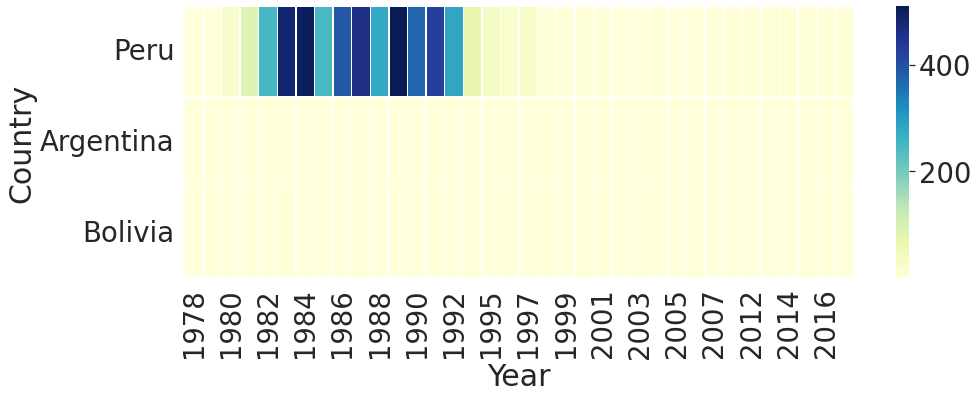

In [ ]:
terror_filter = terror_df2[terror_df2['Group'] == "Shining Path (SL)"]
terror_filter = terror_filter.groupby(['Country','Year'])['Group'].count().unstack()
terror_filter = terror_filter.sort_values([2016], ascending=False)
terror_filter = terror_filter.fillna(0)

f, ax = plt.subplots(figsize=(15, 5)) 
g = sns.heatmap(terror_filter[0:3],cmap='YlGnBu',linewidths=.5,vmin=0.01)
plt.show()

### Q.16(c) Islamic State of Iraq and the Levant (ISIL/ISIS/IS)

ISIS is one terrror group that truly known no boundries, geographic or relegious as can been seen by the attacks on far away Russia and Belgium.

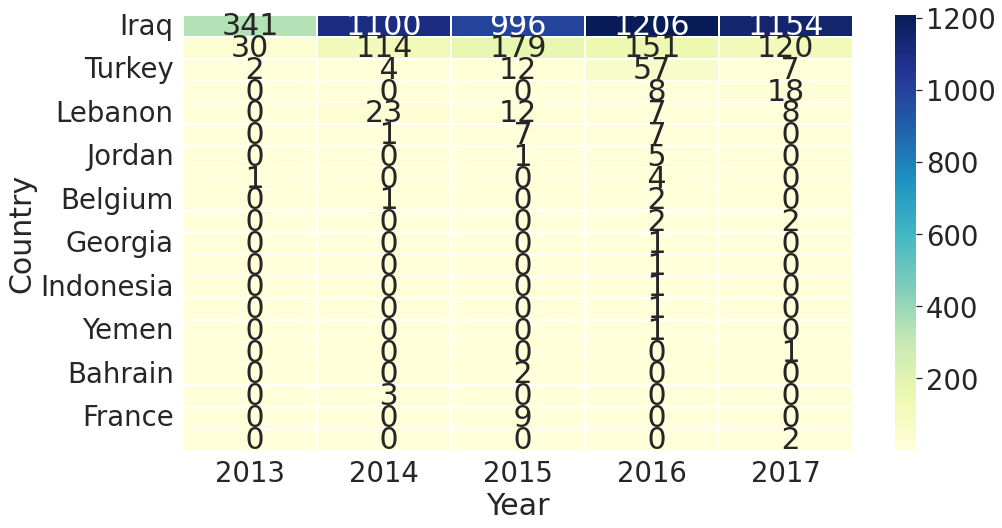

In [ ]:
terror_filter = terror_df2[terror_df2['Group'] == "Islamic State of Iraq and the Levant (ISIL)"]
terror_filter = terror_filter.groupby(['Country','Year'])['Group'].count().unstack()
terror_filter = terror_filter.sort_values([2016], ascending=False)
terror_filter = terror_filter.fillna(0)

f, ax = plt.subplots(figsize=(15,8 )) 
g = sns.heatmap(terror_filter[0:20],annot=True,fmt="2.0f",cmap='YlGnBu',linewidths=.5,vmin=0.01)
plt.show()

### Q.16(d) Farabundo Marti National Liberation Front (FMLN)
Farabundo Marti National Liberation Front was very active in Centeral America, they had the blessing of the Infamous Panamenian Dictator Eduardo Noriega. 

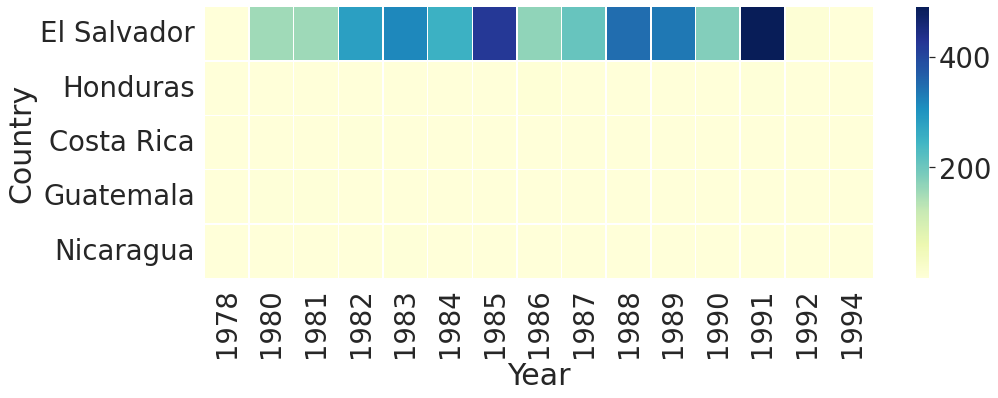

In [ ]:
terror_filter = terror_df2[terror_df2['Group'] == "Farabundo Marti National Liberation Front (FMLN)"]
terror_filter = terror_filter.groupby(['Country','Year'])['Group'].count().unstack()
terror_filter = terror_filter.sort_values([1991], ascending=False)
terror_filter = terror_filter.fillna(0)
f, ax = plt.subplots(figsize=(15, 5)) 
g = sns.heatmap(terror_filter[0:10],cmap='YlGnBu',linewidths=.5,vmin=0.01)
plt.show()

### Q.16(e) Al Shabab

Al Shabab is an armed inslamist organisation based out of the Horn of Africa, it is very active in SOmalia and Somaliland as well as some high profile attacks on Kenya authorities and malls.

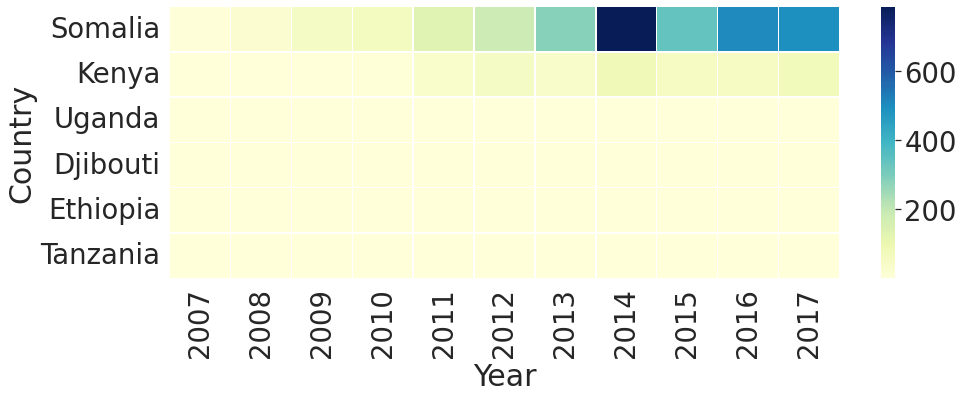

In [ ]:
terror_filter = terror_df2[terror_df2['Group'] == "Al-Shabaab"]
terror_filter = terror_filter.groupby(['Country','Year'])['Group'].count().unstack()
terror_filter = terror_filter.sort_values([2016], ascending=False)
terror_filter = terror_filter.fillna(0)
f, ax = plt.subplots(figsize=(15, 5)) 
g = sns.heatmap(terror_filter[0:10],cmap='YlGnBu',linewidths=.5,vmin=0.01)
plt.show()

### Q.17 How terror Outfits Take Responsibility of their Attacks?

In this heatmap, we shall understand what is the go-to meathod of these terror outfits tot claim responsibility of their attacks.





---



---



---
Its seen that **Taliban, ISIS, Al-Shabab and Tehrik-i-Taliban Pakistan** accept the responsibility of their attack personally or they use recruited brainwashed young minds to post and gloat about their heinous activity on websites or blogs.



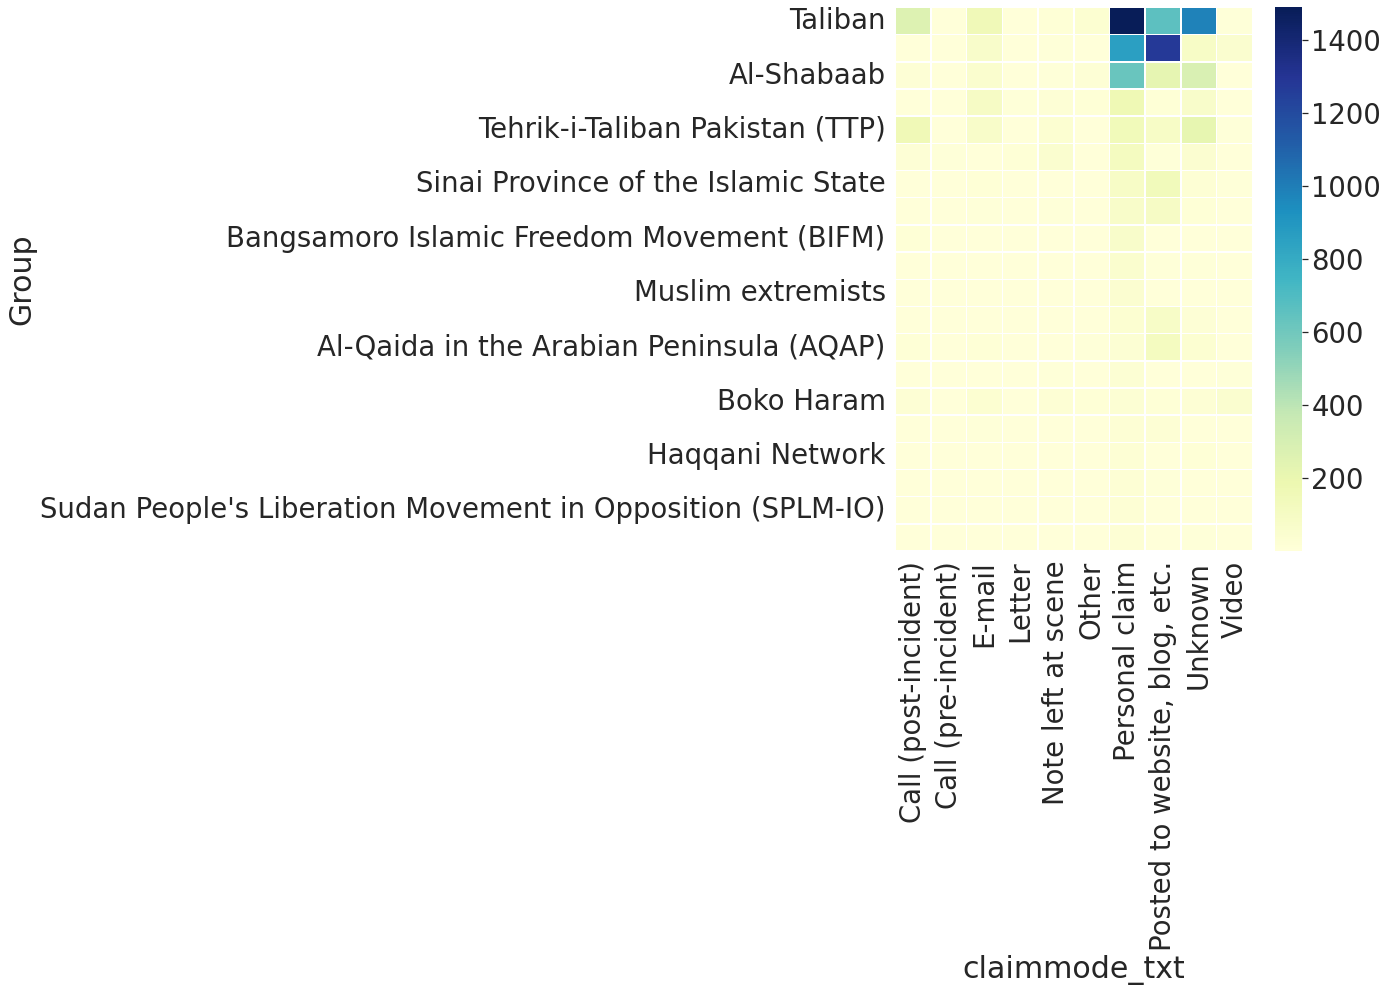

In [ ]:
terror_filter = terror_df[['Group','claimmode_txt']]
terror_filter = terror_filter.groupby(['Group','claimmode_txt'])['Group'].count().unstack()
terror_filter = terror_filter.sort_values(['Personal claim','Posted to website, blog, etc.'], ascending=False)
terror_filter = terror_filter.fillna(0)
f, ax = plt.subplots(figsize=(8, 10)) 
g = sns.heatmap(terror_filter[0:20],cmap='YlGnBu',linewidths=.5,vmin=0.01)
plt.show()

### Annual Dynamics

### Q18. How has Terror Attacks through the Regions evolved over the decades?


We shall now plot an sns set to visualize the terrror attack on each region per decade.

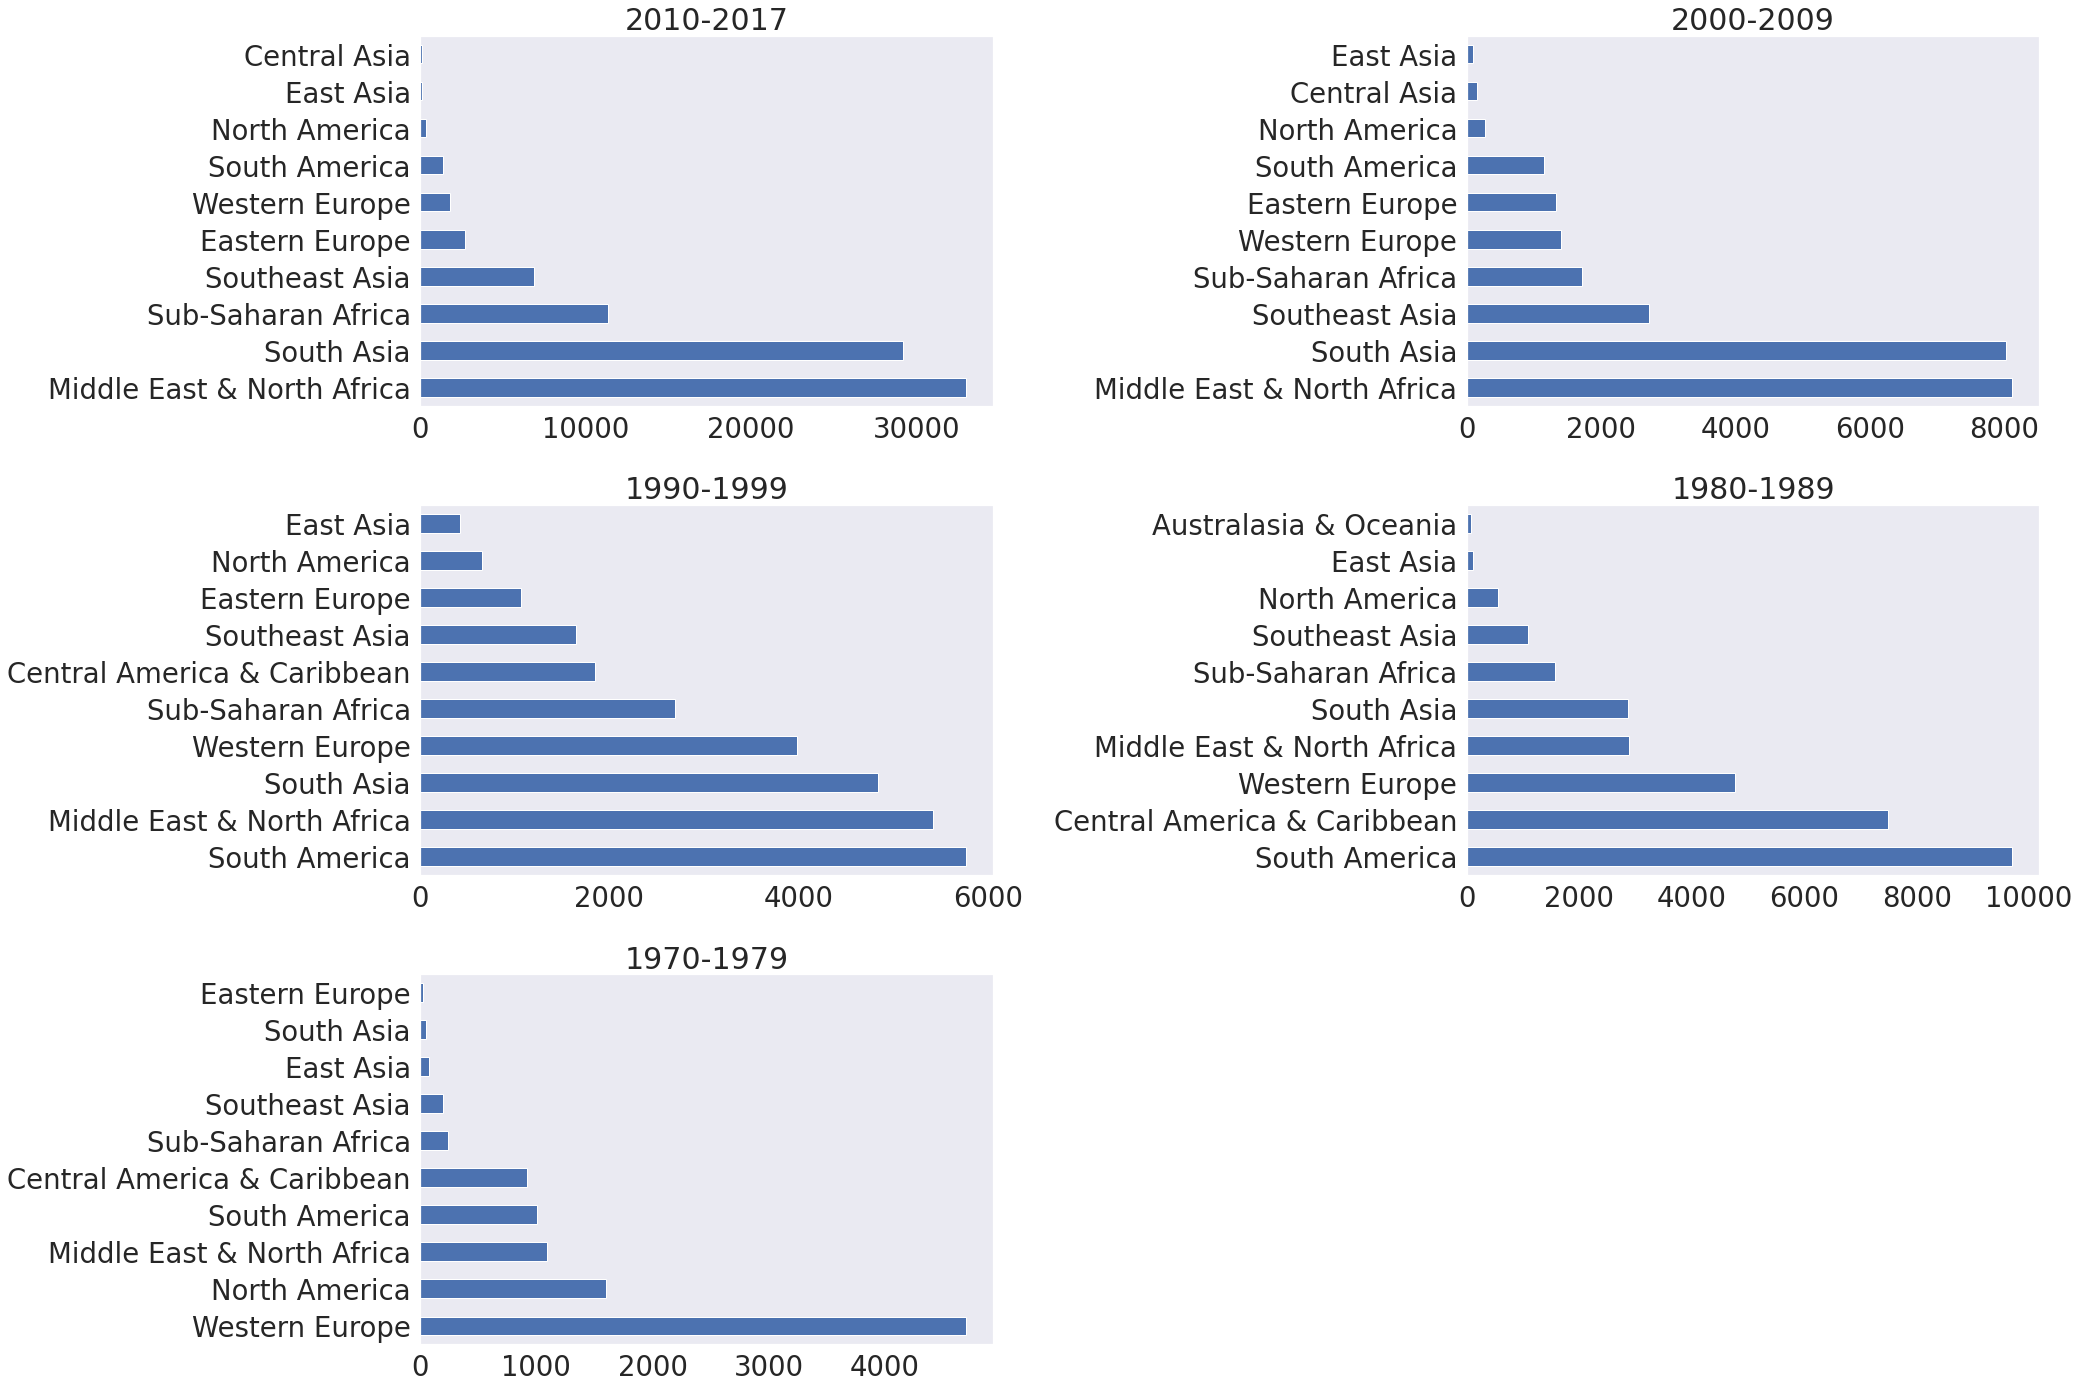

In [ ]:
def plot_by_years(kind='Region', big=(30,20)):
  sns.set(style='dark', font_scale=2.5)
  fig = plt.figure(figsize=big)
  ax1 = fig.add_subplot(3,2,1)
  ax1.set_title('2010-2017')
  ax1.set_ylabel('');
  terror_df2[terror_df2['Year']>=2010]['Event_ID'].groupby(terror_df2[kind]).count().sort_values(ascending=False)[:10].plot(kind='barh');
  ax1.set_ylabel('');

  ax2 = fig.add_subplot(3,2,2)
  ax2.set_title('2000-2009')
  terror_df2[(terror_df2['Year']>=2000) & (terror_df2['Year']<2010)]['Event_ID'].groupby(terror_df2[kind]).count().sort_values(ascending=False)[:10].plot(kind='barh');
  ax2.set_ylabel('');

  ax3 = fig.add_subplot(3,2,3)
  ax3.set_title('1990-1999')
  terror_df2[(terror_df2['Year']>=1990) & (terror_df2['Year']<2000)]['Event_ID'].groupby(terror_df2[kind]).count().sort_values(ascending=False)[:10].plot(kind='barh');
  ax3.set_ylabel('');

  ax4 = fig.add_subplot(3,2,4)
  ax4.set_title('1980-1989')
  terror_df2[(terror_df2['Year']>=1980) & (terror_df2['Year']<1990)]['Event_ID'].groupby(terror_df2[kind]).count().sort_values(ascending=False)[:10].plot(kind='barh');
  ax4.set_ylabel('');

  ax5 = fig.add_subplot(3,2,5)
  ax5.set_title('1970-1979')
  terror_df2[(terror_df2['Year']>=1970) & (terror_df2['Year']<1980)]['Event_ID'].groupby(terror_df2[kind]).count().sort_values(ascending=False)[:10].plot(kind='barh');
  
  plt.tight_layout()
  plt.ylabel('');



plot_by_years(kind='Region')

As we look at Terrorism throught the decades via the lens of the region

#### Annual Dynamics through Map

### Q.19 What is the average number of people killed per attack by region?


*   Sub-Saharan Africa : 4.92

*   Central America & Caribbean : 3.58

*   Middle East & North Africa : 2.86

*   South Asia : 2.3

*   Central Asia:1.79

*   South America:1.67

*   East Asia:1.51

*   Eastern Europe:1.49

*   North America : 1.46

*   Southeast Asia:1.28

*   Australasia & Oceania : 0.54

*   Western Europe : 0.43


In [ ]:
import matplotlib.animation as animation

regions=list(set(terror_df2.Region))

In [ ]:
region_mean_kills = []
for region in regions:
    region_mean_kills.append(terror_df2.Killed[terror_df2.Region == region].mean())

print('Average number of people killed per attack by Region\n')
for i, region in enumerate(regions):
    print('{}:{}'.format(region, round(region_mean_kills[i],2)))

Average number of people killed per attack by Region

South America:1.67
North America:1.46
South Asia:2.3
East Asia:1.51
Sub-Saharan Africa:4.92
Central Asia:1.79
Central America & Caribbean:3.58
Australasia & Oceania:0.54
Southeast Asia:1.28
Western Europe:0.43
Middle East & North Africa:2.86
Eastern Europe:1.49


### Q 20. Which terror outfit has conducted the most Suicide Attacks?


The most suicide attacks have been conducted by ISIS and their freequency has increased manifold in the last decade. This can be seen by the Heatmap created below.

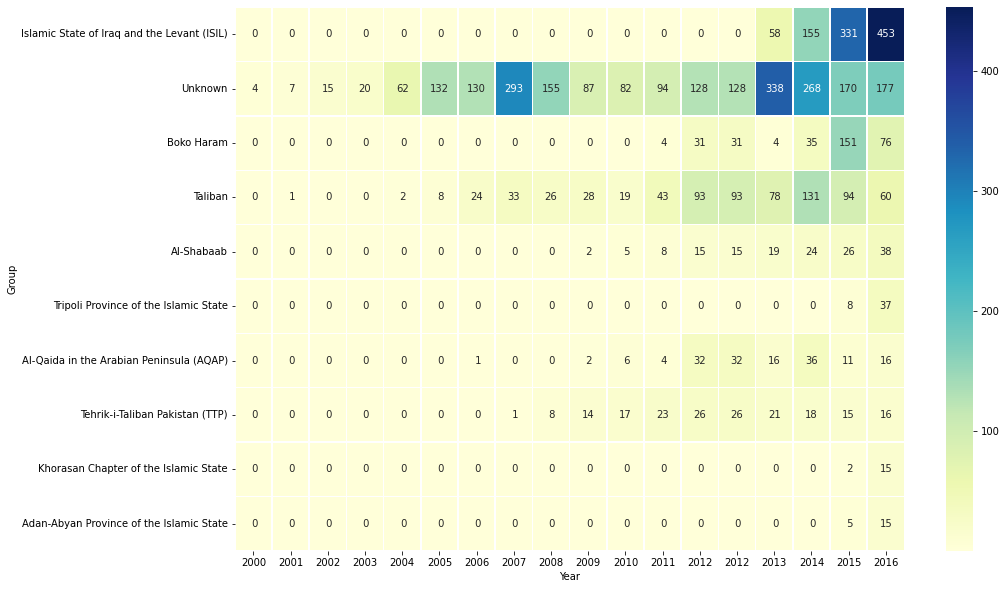

In [ ]:
terror_filter = terror_df2[terror_df2['Suicide'] == 1]
terror_filter = terror_filter.groupby(['Group','Year'])['Group'].count().unstack()
terror_filter = terror_filter[[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2012,2013,2014,2015,2016]]
terror_filter = terror_filter.sort_values([2016], ascending=False)
terror_filter = terror_filter.fillna(0)
f, ax = plt.subplots(figsize=(15, 10)) 
g = sns.heatmap(terror_filter[0:10],annot=True,fmt="2.0f",cmap='YlGnBu',linewidths=.5,vmin=0.01)
plt.show()

## SUMMARY and CONCLUSION

Here's a brief summary of the proocess we followed for the Exploratory Data Analysis of The Global Terrorism Dataset.

1. We downloaded the dataset using the `opendataset` library from kaggle.
2. We performed the following actions on the dataset.
*   Loaded the data using Pandas.
*   Looked at the information about the dataset.
*   Fixed any missing or incorrect values.
3. We analysied the below columns to generate insights:

*   Country
*   City
*   Region
*   Group
*   Month
*   Attack Type
*   Target Type

4. Used the dataset to answer Questions:








---

CONCLUSIONS

1. The dataset has a shape of (181691, 135)
2. Of the attributes selected, 45% had null values, the maximum being present in summary and motive.
3. Iraq has been the worst affected country.
4. Baghdad has been the worst affected city.
5. Middle East and North Africa, followed by South Asia are the worst affected regions.
6. Bombing/Explosion is the most common attack type.
7. Private Citizens and Property are the most common Target type.
8. Private Citizens and Property have almost always been the go to target types for terror outfits. Except for in the 1970's and the 1980's, where Businesses and Military installations were the top targets respectively.
9. The worst terrror attack i.e the one with the most casualtities was the 9/11 attack on World Trade Centre
10. Iraq has had the most nnumber of attacks on Private property, military installations and Journalists and Media outlets.
11. The top 5 active terror groups are:
*   Taliban
*   Shining Path
*   ISIS/ISIL/Islamic State
*   FMLN
*   Al-Shabab
12. Taliban, ISIS, Al-Shabab and Tehrik-i-Taliban Pakistan accept the responsibility of their attack personally or they use recruited brainwashed young minds to post and gloat about their heinous activity on websites or blogs.
13. Terrorist activities have seen a eastward trent over the ast 5 decades, the majority of the activities have shifter from the western hemisphere to the global south.
14. Sub-Saharan Africa has the highest number of casualties at 4.92 per attack. Eastern eurpoe has the least at 1.49. This number is directly proportional to population density.
15. The most suicide attacks have been conducted by ISIS, Taliban or other islamic extremists. Their freequency has increased manifold in the last decade.







## FUTURE WORK

Here are some ways the project can be extended:

1. We can create an GIF and plot all the different attacks through the years.

2. We can do an NLP on the event sunmary and fins out further insights.